Set some test folders with VASP output files for execution in the notebook!

In [1]:
# Please note that I am reusing the same relaxations here in several steps. This is only to save storage on our repo. It has on influence on the result.
ref_paths = {
    "tight relax 1_mp-117_0.94_pre1": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 1_mp-117_0.94_0": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 1_mp-117_0.94_1": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "dft tight relax 1_mp-117_0.94_0": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 2_mp-117_0.94_pre1": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 2_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 2_mp-117_0.94_1": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "dft tight relax 2_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "dft static_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 1_mp-117_1.0_pre1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 1_mp-117_1.0_0": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 1_mp-117_1.0_1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "dft tight relax 1_mp-117_1.0_0": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "dft tight relax 1_mp-117_1.0_1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 2_mp-117_1.0_pre1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 2_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 2_mp-117_1.0_1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft tight relax 2_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft tight relax 2_mp-117_1.0_1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft static_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 1_mp-117_1.06_pre1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 1_mp-117_1.06_0": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 1_mp-117_1.06_1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "dft tight relax 1_mp-117_1.06_0": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "dft tight relax 1_mp-117_1.06_1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 2_mp-117_1.06_pre1": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "tight relax 2_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "tight relax 2_mp-117_1.06_1": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "dft tight relax 2_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "dft static_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "Sn-stat_iso_atom_0": "tutorial_data/Sn-stat_iso_atom_0_25",
    "Sn-stat_iso_atom_1": "tutorial_data/Sn-stat_iso_atom_0_25",
    "dft rattle static 1/1_mp-117_0.94_0": "tutorial_data/dft_rattle_static_1_1_mp-117_0.94_0_63",
    "dft rattle static 1/1_mp-117_0.94_1": "tutorial_data/dft_rattle_static_1_1_mp-117_0.94_1_257",
    "dft rattle static 1/1_mp-117_1.0_0": "tutorial_data/dft_rattle_static_1_1_mp-117_1.0_0_65",
    "dft rattle static 1/1_mp-117_1.0_1": "tutorial_data/dft_rattle_static_1_1_mp-117_1.0_1_255",
    "dft rattle static 1/1_mp-117_1.06_0": "tutorial_data/dft_rattle_static_1_1_mp-117_1.06_0_67",
    "dft rattle static 1/1_mp-117_1.06_1": "tutorial_data/dft_rattle_static_1_1_mp-117_1.06_1_259",
    "dft phonon static 1/1_mp-117_0.94_0": "tutorial_data/dft_phonon_static_1_1_mp-117_0.94_0_193",
    "dft phonon static 1/1_mp-117_1.0_0": "tutorial_data/dft_phonon_static_1_1_mp-117_1.0_0_189",
    "dft phonon static 1/1_mp-117_1.06_0": "tutorial_data/dft_phonon_static_1_1_mp-117_1.06_0_191",
}

In [2]:
from atomate2.vasp.flows.core import DoubleRelaxMaker
from atomate2.vasp.jobs.core import StaticMaker, TightRelaxMaker
from atomate2.vasp.jobs.phonons import PhononDisplacementMaker
from atomate2.vasp.sets.core import StaticSetGenerator, TightRelaxSetGenerator
from autoplex.auto.phonons.flows import (
    CompleteDFTvsMLBenchmarkWorkflow,
    IterativeCompleteDFTvsMLBenchmarkWorkflow,
)
from jobflow import run_locally, Flow
from pymatgen.core.structure import Structure

from mock_vasp import TEST_DIR, mock_vasp

/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.2.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


First, we define all relevant Makers for the workflow, used to train and finetune ML potentials for phonons. We need one for the relaxation in advance of the workflow and te later relaxations.

In [3]:
phonon_bulk_relax_maker = DoubleRelaxMaker.from_relax_maker(
    TightRelaxMaker(
        run_vasp_kwargs={"handlers": ()},
        input_set_generator=TightRelaxSetGenerator(
            user_incar_settings={
                "GGA": "PE",
                "ISPIN": 1,
                "KSPACING": 0.1,
                "ALGO": "Normal",
                "LAECHG": False,
                "ISMEAR": 1,
                "ENCUT": 700,
                "IBRION": 1,
                "ISYM": 0,
                "SIGMA": 0.05,
                "LCHARG": False,
                "LWAVE": False,
                "LVTOT": False,
                "LORBIT": None,
                "LOPTICS": False,
                "LREAL": False,
                "ISIF": 4,
                "NPAR": 4,
            }
        ),
    )
)

In [4]:
phonon_displacement_maker = PhononDisplacementMaker(
    name="dft phonon static",
    run_vasp_kwargs={"handlers": ()},
    input_set_generator=StaticSetGenerator(
        user_incar_settings={
            "GGA": "PE",
            "IBRION": -1,
            "ISPIN": 1,
            "ISMEAR": 1,
            "ISIF": 3,
            "ENCUT": 700,
            "EDIFF": 1e-7,
            "LAECHG": False,
            "LREAL": False,
            "ALGO": "Normal",
            "NSW": 0,
            "LCHARG": False,
            "LWAVE": False,
            "LVTOT": False,
            "LORBIT": None,
            "LOPTICS": False,
            "SIGMA": 0.05,
            "ISYM": 0,
            "KSPACING": 0.1,
            "NPAR": 4,
        },
        auto_ispin=False,
    ),
)

In [5]:
phonon_static_energy_maker = phonon_displacement_maker

static_isolated_atom_maker = StaticMaker(
    run_vasp_kwargs={"handlers": ()},
    input_set_generator=StaticSetGenerator(
        user_kpoints_settings={"reciprocal_density": 1},
        user_incar_settings={
            "GGA": "PE",
            "ALGO": "Normal",
            "ISPIN": 1,
            "LAECHG": False,
            "ISMEAR": 0,
            "LCHARG": False,
            "LWAVE": False,
            "LVTOT": False,
            "LORBIT": None,
            "LOPTICS": False,
            "NPAR": 4,
        },
    ),
)

First, collect a number of structures and then optimize them in advance of the workflow. One can also perform subsequent optimizations with different k-point settings, for example.

In [6]:
job_list = []


structure_list = []
benchmark_structure_list = []
start_mpids = ["mp-117"]
start_poscar = [TEST_DIR / "tutorial_data/POSCAR-mp-117"]

mpids = []
for mpid, start_poscar in zip(start_mpids, start_poscar):
    for scale in [0.94, 1.0, 1.06]:
        structure = Structure.from_file(start_poscar)
        volume = structure.copy().volume
        structure = structure.scale_lattice((scale**3) * volume)  # added the cube
        job_opt = phonon_bulk_relax_maker.make(structure)
        job_opt.append_name("_" + mpid + "_" + str(scale) + "_pre1")
        job_list.append(job_opt)
        structure_list.append(job_opt.output.structure)
        mpids.append(mpid + "_" + str(scale))


mpbenchmark = mpids
benchmark_structure_list = structure_list

In [7]:
iteration_flow = IterativeCompleteDFTvsMLBenchmarkWorkflow(
    max_iterations=2, # with the current test data, you can switch between 1 and 2
    rms_max=0.2,
    complete_dft_vs_ml_benchmark_workflow_0=CompleteDFTvsMLBenchmarkWorkflow(
        symprec=1e-3,
        apply_data_preprocessing=True,
        add_dft_rattled_struct=True,
        add_dft_phonon_struct=True,
        volume_custom_scale_factors=[1.0],
        rattle_type=0,
        distort_type=0,
        rattle_std=0.1,  #
        benchmark_kwargs={"relax_maker_kwargs": {"relax_cell": False}},
        supercell_settings={
            "min_length": 10,
            "max_length": 15,
            "min_atoms": 10,
            "max_atoms": 300,
            "fallback_min_length": 9,
        },
        # settings that worked with a GAP
        split_ratio=0.33,
        regularization=False,
        separated=False,
        num_processes_fit=48,
        displacement_maker=phonon_displacement_maker,
        phonon_bulk_relax_maker=phonon_bulk_relax_maker,
        phonon_static_energy_maker=phonon_static_energy_maker,
        rattled_bulk_relax_maker=phonon_bulk_relax_maker,
        isolated_atom_maker=static_isolated_atom_maker,
    ),
    complete_dft_vs_ml_benchmark_workflow_1=CompleteDFTvsMLBenchmarkWorkflow(
        symprec=1e-3,
        apply_data_preprocessing=True,
        add_dft_phonon_struct=False,
        add_dft_rattled_struct=True,
        volume_custom_scale_factors=[1.0],
        rattle_type=0,
        distort_type=0,
        rattle_std=0.1,  # maybe 0.1
        benchmark_kwargs={"relax_maker_kwargs": {"relax_cell": False}},
        supercell_settings={
            "min_length": 10,
            "max_length": 15,
            "min_atoms": 10,
            "max_atoms": 300,
            "fallback_min_length": 9,
        },
        # settings that worked with a GAP
        split_ratio=0.33,
        regularization=False,
        separated=False,
        num_processes_fit=48,
        displacement_maker=phonon_displacement_maker,
        phonon_bulk_relax_maker=phonon_bulk_relax_maker,
        phonon_static_energy_maker=phonon_static_energy_maker,
        rattled_bulk_relax_maker=phonon_bulk_relax_maker,
        isolated_atom_maker=static_isolated_atom_maker,
    ),
).make(
    structure_list=structure_list,
    mp_ids=mpids,
    benchmark_structures=benchmark_structure_list,
    benchmark_mp_ids=mpbenchmark,
    rattle_seed=0,
    fit_kwargs_list=[
        {
            "soap": {
                "delta": 1.0,
                "l_max": 12,
                "n_max": 10,
                "atom_sigma": 0.5,
                "zeta": 4,
                "cutoff": 5.0,
                "cutoff_transition_width": 1.0,
                "central_weight": 1.0,
                "n_sparse": 6000,
                "f0": 0.0,
                "covariance_type": "dot_product",
                "sparse_method": "cur_points",
            },
            "general": {
                "two_body": True,
                "three_body": False,
                "soap": True,
                "default_sigma": "{0.001 0.05 0.05 0.0}",
                "sparse_jitter": 1.0e-8,
            },
        }
    ],
)

job_list.append(iteration_flow)
autoplex_flow = Flow(jobs=job_list, output=iteration_flow.output)

Now, we are mocking the VASP execution. If you would like leave all folders from the run, set `clean_folders` to False!

2025-02-18 10:07:23,289 INFO Started executing jobs locally


2025-02-18 10:07:23,289 - INFO - Started executing jobs locally


2025-02-18 10:07:23,312 INFO Starting job - tight relax 1_mp-117_0.94_pre1 (b25393e9-d81b-4c5a-a968-aeb5951ab842)


2025-02-18 10:07:23,312 - INFO - Starting job - tight relax 1_mp-117_0.94_pre1 (b25393e9-d81b-4c5a-a968-aeb5951ab842)
2025-02-18 10:07:23,315 - INFO - Writing VASP input set.
2025-02-18 10:07:23,317 - INFO - Running fake VASP.
2025-02-18 10:07:23,317 - INFO - Verified inputs successfully
2025-02-18 10:07:23,318 - INFO - Cleared vasp inputs
2025-02-18 10:07:23,332 - INFO - Generated fake vasp outputs
2025-02-18 10:07:23,333 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-23-309795-63580
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-18 10:07:24,227 - WARNING - Error in parsing bandstructure
2025-02-18 10:07:24,227 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:07:24,269 INFO Finished job - tight relax 1_mp-117_0.94_pre1 (b25393e9-d81b-4c5a-a968-aeb5951ab842)


2025-02-18 10:07:24,269 - INFO - Finished job - tight relax 1_mp-117_0.94_pre1 (b25393e9-d81b-4c5a-a968-aeb5951ab842)


2025-02-18 10:07:24,269 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:24,269 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:24,270 INFO Starting job - tight relax 1_mp-117_1.0_pre1 (1fcab244-722a-4712-8698-ad82c28dff1f)


2025-02-18 10:07:24,270 - INFO - Starting job - tight relax 1_mp-117_1.0_pre1 (1fcab244-722a-4712-8698-ad82c28dff1f)
2025-02-18 10:07:24,273 - INFO - Writing VASP input set.
2025-02-18 10:07:24,276 - INFO - Running fake VASP.
2025-02-18 10:07:24,276 - INFO - Verified inputs successfully
2025-02-18 10:07:24,277 - INFO - Cleared vasp inputs
2025-02-18 10:07:24,294 - INFO - Generated fake vasp outputs
2025-02-18 10:07:24,295 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-24-270530-83974
2025-02-18 10:07:24,786 - WARNING - Error in parsing bandstructure
2025-02-18 10:07:24,786 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:07:24,825 INFO Finished job - tight relax 1_mp-117_1.0_pre1 (1fcab244-722a-4712-8698-ad82c28dff1f)


2025-02-18 10:07:24,825 - INFO - Finished job - tight relax 1_mp-117_1.0_pre1 (1fcab244-722a-4712-8698-ad82c28dff1f)


2025-02-18 10:07:24,827 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:24,827 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:24,828 INFO Starting job - tight relax 1_mp-117_1.06_pre1 (855351fb-71f3-4a9d-8e3c-b9ddf72be822)


2025-02-18 10:07:24,828 - INFO - Starting job - tight relax 1_mp-117_1.06_pre1 (855351fb-71f3-4a9d-8e3c-b9ddf72be822)
2025-02-18 10:07:24,832 - INFO - Writing VASP input set.
2025-02-18 10:07:24,834 - INFO - Running fake VASP.
2025-02-18 10:07:24,835 - INFO - Verified inputs successfully
2025-02-18 10:07:24,837 - INFO - Cleared vasp inputs
2025-02-18 10:07:24,853 - INFO - Generated fake vasp outputs
2025-02-18 10:07:24,853 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-24-828737-10267
2025-02-18 10:07:25,548 - WARNING - Error in parsing bandstructure
2025-02-18 10:07:25,548 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:07:25,589 INFO Finished job - tight relax 1_mp-117_1.06_pre1 (855351fb-71f3-4a9d-8e3c-b9ddf72be822)


2025-02-18 10:07:25,589 - INFO - Finished job - tight relax 1_mp-117_1.06_pre1 (855351fb-71f3-4a9d-8e3c-b9ddf72be822)


2025-02-18 10:07:25,590 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:25,590 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:25,590 INFO Starting job - tight relax 2_mp-117_0.94_pre1 (d29889e5-103e-437d-b2ba-bfc1744b3600)


2025-02-18 10:07:25,590 - INFO - Starting job - tight relax 2_mp-117_0.94_pre1 (d29889e5-103e-437d-b2ba-bfc1744b3600)
2025-02-18 10:07:25,604 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-23-309795-63580
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-25-590679-91138/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:25,684 - INFO - Finished copying inputs
2025-02-18 10:07:26,456 - INFO - Writing VASP input set.
2025-02-18 10:07:26,458 - INFO - Running fake VASP.
2025-02-18 10:07:26,459 - INFO - Verified inputs successfully
2025-02-18 10:07:26,461 - INFO - Cleared vasp inputs
2025-02-18 10:07:26,478 - INFO - Generated fake vasp outputs
2025-02-18 10:07:26,479 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-25-590679-91138
2025-02-18 10:07:27,113 -

2025-02-18 10:07:27,160 INFO Finished job - tight relax 2_mp-117_0.94_pre1 (d29889e5-103e-437d-b2ba-bfc1744b3600)


2025-02-18 10:07:27,160 - INFO - Finished job - tight relax 2_mp-117_0.94_pre1 (d29889e5-103e-437d-b2ba-bfc1744b3600)


2025-02-18 10:07:27,161 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:27,161 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:27,162 INFO Starting job - tight relax 2_mp-117_1.0_pre1 (1cef5047-f6e7-4a9a-aec0-578468c18e58)


2025-02-18 10:07:27,162 - INFO - Starting job - tight relax 2_mp-117_1.0_pre1 (1cef5047-f6e7-4a9a-aec0-578468c18e58)
2025-02-18 10:07:27,181 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-24-270530-83974
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-27-161871-89317/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:27,247 - INFO - Finished copying inputs
2025-02-18 10:07:27,873 - INFO - Writing VASP input set.
2025-02-18 10:07:27,875 - INFO - Running fake VASP.
2025-02-18 10:07:27,875 - INFO - Verified inputs successfully
2025-02-18 10:07:27,877 - INFO - Cleared vasp inputs
2025-02-18 10:07:27,891 - INFO - Generated fake vasp outputs
2025-02-18 10:07:27,892 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-27-161871-89317
2025-02-18 10:07:28,394 - 

2025-02-18 10:07:28,428 INFO Finished job - tight relax 2_mp-117_1.0_pre1 (1cef5047-f6e7-4a9a-aec0-578468c18e58)


2025-02-18 10:07:28,428 - INFO - Finished job - tight relax 2_mp-117_1.0_pre1 (1cef5047-f6e7-4a9a-aec0-578468c18e58)


2025-02-18 10:07:28,429 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:28,429 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:28,430 INFO Starting job - tight relax 2_mp-117_1.06_pre1 (8861a057-4de7-4c0e-b40b-ce11a31f1dca)


2025-02-18 10:07:28,430 - INFO - Starting job - tight relax 2_mp-117_1.06_pre1 (8861a057-4de7-4c0e-b40b-ce11a31f1dca)
2025-02-18 10:07:28,444 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-24-828737-10267
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-28-430581-14634/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:28,510 - INFO - Finished copying inputs
2025-02-18 10:07:29,138 - INFO - Writing VASP input set.
2025-02-18 10:07:29,140 - INFO - Running fake VASP.
2025-02-18 10:07:29,140 - INFO - Verified inputs successfully
2025-02-18 10:07:29,142 - INFO - Cleared vasp inputs
2025-02-18 10:07:29,157 - INFO - Generated fake vasp outputs
2025-02-18 10:07:29,157 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-28-430581-14634
2025-02-18 10:07:29,960 -

2025-02-18 10:07:29,993 INFO Finished job - tight relax 2_mp-117_1.06_pre1 (8861a057-4de7-4c0e-b40b-ce11a31f1dca)


2025-02-18 10:07:29,993 - INFO - Finished job - tight relax 2_mp-117_1.06_pre1 (8861a057-4de7-4c0e-b40b-ce11a31f1dca)


2025-02-18 10:07:29,994 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:29,994 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:29,995 INFO Starting job - do_iterative_rattled_structures (13d3d17c-97bc-4bfe-af35-114497ef6284)


2025-02-18 10:07:29,995 - INFO - Starting job - do_iterative_rattled_structures (13d3d17c-97bc-4bfe-af35-114497ef6284)
2025-02-18 10:07:30,056 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-18 10:07:30,067 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-18 10:07:30,077 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.


2025-02-18 10:07:30,134 INFO Finished job - do_iterative_rattled_structures (13d3d17c-97bc-4bfe-af35-114497ef6284)


2025-02-18 10:07:30,134 - INFO - Finished job - do_iterative_rattled_structures (13d3d17c-97bc-4bfe-af35-114497ef6284)


2025-02-18 10:07:30,208 INFO Starting job - reduce_supercell_size_job_0 (5851510b-abcd-4f81-8ff0-a28353256e09)


2025-02-18 10:07:30,208 - INFO - Starting job - reduce_supercell_size_job_0 (5851510b-abcd-4f81-8ff0-a28353256e09)


2025-02-18 10:07:30,211 INFO Finished job - reduce_supercell_size_job_0 (5851510b-abcd-4f81-8ff0-a28353256e09)


2025-02-18 10:07:30,211 - INFO - Finished job - reduce_supercell_size_job_0 (5851510b-abcd-4f81-8ff0-a28353256e09)


2025-02-18 10:07:30,212 INFO Starting job - reduce_supercell_size_job_0 (3d84d636-c557-4506-8085-f6c7e7ce48d6)


2025-02-18 10:07:30,212 - INFO - Starting job - reduce_supercell_size_job_0 (3d84d636-c557-4506-8085-f6c7e7ce48d6)


2025-02-18 10:07:30,216 INFO Finished job - reduce_supercell_size_job_0 (3d84d636-c557-4506-8085-f6c7e7ce48d6)


2025-02-18 10:07:30,216 - INFO - Finished job - reduce_supercell_size_job_0 (3d84d636-c557-4506-8085-f6c7e7ce48d6)


2025-02-18 10:07:30,217 INFO Starting job - reduce_supercell_size_job_0 (f551d3c7-cae8-4610-b683-bc39726790ca)


2025-02-18 10:07:30,217 - INFO - Starting job - reduce_supercell_size_job_0 (f551d3c7-cae8-4610-b683-bc39726790ca)


2025-02-18 10:07:30,231 INFO Finished job - reduce_supercell_size_job_0 (f551d3c7-cae8-4610-b683-bc39726790ca)


2025-02-18 10:07:30,231 - INFO - Finished job - reduce_supercell_size_job_0 (f551d3c7-cae8-4610-b683-bc39726790ca)


2025-02-18 10:07:30,232 INFO Starting job - get_iso_atom_0 (1f2d3662-3696-4278-9199-8ee92f997441)


2025-02-18 10:07:30,232 - INFO - Starting job - get_iso_atom_0 (1f2d3662-3696-4278-9199-8ee92f997441)


2025-02-18 10:07:30,352 INFO Finished job - get_iso_atom_0 (1f2d3662-3696-4278-9199-8ee92f997441)


2025-02-18 10:07:30,352 - INFO - Finished job - get_iso_atom_0 (1f2d3662-3696-4278-9199-8ee92f997441)


2025-02-18 10:07:30,353 INFO Starting job - Sn-stat_iso_atom_0 (e8c2dde0-22ce-4d5b-b047-e4176a719153)


2025-02-18 10:07:30,353 - INFO - Starting job - Sn-stat_iso_atom_0 (e8c2dde0-22ce-4d5b-b047-e4176a719153)
2025-02-18 10:07:30,358 - INFO - Writing VASP input set.
2025-02-18 10:07:30,359 - INFO - Running fake VASP.
2025-02-18 10:07:30,360 - INFO - Verified inputs successfully
2025-02-18 10:07:30,361 - INFO - Cleared vasp inputs
2025-02-18 10:07:30,378 - INFO - Generated fake vasp outputs
2025-02-18 10:07:30,379 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-30-353641-68127


2025-02-18 10:07:30,449 INFO Finished job - Sn-stat_iso_atom_0 (e8c2dde0-22ce-4d5b-b047-e4176a719153)


2025-02-18 10:07:30,449 - INFO - Finished job - Sn-stat_iso_atom_0 (e8c2dde0-22ce-4d5b-b047-e4176a719153)


2025-02-18 10:07:30,450 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:30,450 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:30,451 INFO Starting job - store_inputs_0 (1f2d3662-3696-4278-9199-8ee92f997441, 2)


2025-02-18 10:07:30,451 - INFO - Starting job - store_inputs_0 (1f2d3662-3696-4278-9199-8ee92f997441, 2)


2025-02-18 10:07:30,453 INFO Finished job - store_inputs_0 (1f2d3662-3696-4278-9199-8ee92f997441, 2)


2025-02-18 10:07:30,453 - INFO - Finished job - store_inputs_0 (1f2d3662-3696-4278-9199-8ee92f997441, 2)


2025-02-18 10:07:30,454 INFO Starting job - rattled supercells_mp-117_0.94_0 (98ac55fe-afc5-4c69-8766-e7882b0c40ea)


2025-02-18 10:07:30,454 - INFO - Starting job - rattled supercells_mp-117_0.94_0 (98ac55fe-afc5-4c69-8766-e7882b0c40ea)


2025-02-18 10:07:30,635 INFO Finished job - rattled supercells_mp-117_0.94_0 (98ac55fe-afc5-4c69-8766-e7882b0c40ea)


2025-02-18 10:07:30,635 - INFO - Finished job - rattled supercells_mp-117_0.94_0 (98ac55fe-afc5-4c69-8766-e7882b0c40ea)


2025-02-18 10:07:30,640 INFO Starting job - tight relax 1_mp-117_0.94_0 (b1455c01-9186-473e-ba55-987e071efcba)


2025-02-18 10:07:30,640 - INFO - Starting job - tight relax 1_mp-117_0.94_0 (b1455c01-9186-473e-ba55-987e071efcba)
2025-02-18 10:07:30,643 - INFO - Writing VASP input set.
2025-02-18 10:07:30,645 - INFO - Running fake VASP.
2025-02-18 10:07:30,646 - INFO - Verified inputs successfully
2025-02-18 10:07:30,647 - INFO - Cleared vasp inputs
2025-02-18 10:07:30,663 - INFO - Generated fake vasp outputs
2025-02-18 10:07:30,663 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-30-639640-26274
2025-02-18 10:07:31,290 - WARNING - Error in parsing bandstructure
2025-02-18 10:07:31,290 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:07:31,326 INFO Finished job - tight relax 1_mp-117_0.94_0 (b1455c01-9186-473e-ba55-987e071efcba)


2025-02-18 10:07:31,326 - INFO - Finished job - tight relax 1_mp-117_0.94_0 (b1455c01-9186-473e-ba55-987e071efcba)


2025-02-18 10:07:31,327 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:31,327 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:31,329 INFO Starting job - tight relax 2_mp-117_0.94_0 (8494e433-940d-4258-9ec2-15a49f606a54)


2025-02-18 10:07:31,329 - INFO - Starting job - tight relax 2_mp-117_0.94_0 (8494e433-940d-4258-9ec2-15a49f606a54)
2025-02-18 10:07:31,343 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-30-639640-26274
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-31-328398-94996/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:31,431 - INFO - Finished copying inputs
2025-02-18 10:07:32,196 - INFO - Writing VASP input set.
2025-02-18 10:07:32,198 - INFO - Running fake VASP.
2025-02-18 10:07:32,199 - INFO - Verified inputs successfully
2025-02-18 10:07:32,200 - INFO - Cleared vasp inputs
2025-02-18 10:07:32,216 - INFO - Generated fake vasp outputs
2025-02-18 10:07:32,217 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-31-328398-94996
2025-02-18 10:07:33,074 - WA

2025-02-18 10:07:33,109 INFO Finished job - tight relax 2_mp-117_0.94_0 (8494e433-940d-4258-9ec2-15a49f606a54)


2025-02-18 10:07:33,109 - INFO - Finished job - tight relax 2_mp-117_0.94_0 (8494e433-940d-4258-9ec2-15a49f606a54)


2025-02-18 10:07:33,109 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:33,109 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:33,110 INFO Starting job - generate_randomized_structures_mp-117_0.94_0 (feba4c3e-62ed-4341-bb0f-18e4da824e66)


2025-02-18 10:07:33,110 - INFO - Starting job - generate_randomized_structures_mp-117_0.94_0 (feba4c3e-62ed-4341-bb0f-18e4da824e66)


2025-02-18 10:07:33,147 INFO Finished job - generate_randomized_structures_mp-117_0.94_0 (feba4c3e-62ed-4341-bb0f-18e4da824e66)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-18 10:07:33,147 - INFO - Finished job - generate_randomized_structures_mp-117_0.94_0 (feba4c3e-62ed-4341-bb0f-18e4da824e66)


2025-02-18 10:07:33,148 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (57653bb1-e981-412e-8c46-5c86d298c788)


2025-02-18 10:07:33,148 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (57653bb1-e981-412e-8c46-5c86d298c788)


2025-02-18 10:07:33,285 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (57653bb1-e981-412e-8c46-5c86d298c788)


2025-02-18 10:07:33,285 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (57653bb1-e981-412e-8c46-5c86d298c788)


2025-02-18 10:07:33,294 INFO Starting job - dft rattle static 1/1_mp-117_0.94_0 (f778193a-69a7-4306-aa3c-304a21ac37f0)


2025-02-18 10:07:33,294 - INFO - Starting job - dft rattle static 1/1_mp-117_0.94_0 (f778193a-69a7-4306-aa3c-304a21ac37f0)
2025-02-18 10:07:33,306 - INFO - Writing VASP input set.
2025-02-18 10:07:33,315 - INFO - Running fake VASP.
2025-02-18 10:07:33,315 - INFO - Verified inputs successfully
2025-02-18 10:07:33,316 - INFO - Cleared vasp inputs
2025-02-18 10:07:33,336 - INFO - Generated fake vasp outputs
2025-02-18 10:07:33,336 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-33-293592-11259


2025-02-18 10:07:34,537 INFO Finished job - dft rattle static 1/1_mp-117_0.94_0 (f778193a-69a7-4306-aa3c-304a21ac37f0)


2025-02-18 10:07:34,537 - INFO - Finished job - dft rattle static 1/1_mp-117_0.94_0 (f778193a-69a7-4306-aa3c-304a21ac37f0)


2025-02-18 10:07:34,538 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:34,538 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:34,539 INFO Starting job - store_inputs_mp-117_0.94_0 (57653bb1-e981-412e-8c46-5c86d298c788, 2)


2025-02-18 10:07:34,539 - INFO - Starting job - store_inputs_mp-117_0.94_0 (57653bb1-e981-412e-8c46-5c86d298c788, 2)


2025-02-18 10:07:34,541 INFO Finished job - store_inputs_mp-117_0.94_0 (57653bb1-e981-412e-8c46-5c86d298c788, 2)


2025-02-18 10:07:34,541 - INFO - Finished job - store_inputs_mp-117_0.94_0 (57653bb1-e981-412e-8c46-5c86d298c788, 2)


2025-02-18 10:07:34,542 INFO Starting job - store_inputs_mp-117_0.94_0 (98ac55fe-afc5-4c69-8766-e7882b0c40ea, 2)


2025-02-18 10:07:34,542 - INFO - Starting job - store_inputs_mp-117_0.94_0 (98ac55fe-afc5-4c69-8766-e7882b0c40ea, 2)


2025-02-18 10:07:34,544 INFO Finished job - store_inputs_mp-117_0.94_0 (98ac55fe-afc5-4c69-8766-e7882b0c40ea, 2)


2025-02-18 10:07:34,544 - INFO - Finished job - store_inputs_mp-117_0.94_0 (98ac55fe-afc5-4c69-8766-e7882b0c40ea, 2)


2025-02-18 10:07:34,545 INFO Starting job - single-atom displaced supercells_mp-117_0.94_0 (01fb5a06-415f-43db-90a7-c958f9ca91b9)


2025-02-18 10:07:34,545 - INFO - Starting job - single-atom displaced supercells_mp-117_0.94_0 (01fb5a06-415f-43db-90a7-c958f9ca91b9)


2025-02-18 10:07:34,948 INFO Finished job - single-atom displaced supercells_mp-117_0.94_0 (01fb5a06-415f-43db-90a7-c958f9ca91b9)


2025-02-18 10:07:34,948 - INFO - Finished job - single-atom displaced supercells_mp-117_0.94_0 (01fb5a06-415f-43db-90a7-c958f9ca91b9)


2025-02-18 10:07:34,952 INFO Starting job - dft tight relax 1_mp-117_0.94_0 (40b61f7e-0b1c-45c4-9ec4-f60b34d22e00)


2025-02-18 10:07:34,952 - INFO - Starting job - dft tight relax 1_mp-117_0.94_0 (40b61f7e-0b1c-45c4-9ec4-f60b34d22e00)
2025-02-18 10:07:34,955 - INFO - Writing VASP input set.
2025-02-18 10:07:34,957 - INFO - Running fake VASP.
2025-02-18 10:07:34,958 - INFO - Verified inputs successfully
2025-02-18 10:07:34,959 - INFO - Cleared vasp inputs
2025-02-18 10:07:34,977 - INFO - Generated fake vasp outputs
2025-02-18 10:07:34,977 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-34-952471-36392
2025-02-18 10:07:35,865 - WARNING - Error in parsing bandstructure
2025-02-18 10:07:35,865 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:07:35,907 INFO Finished job - dft tight relax 1_mp-117_0.94_0 (40b61f7e-0b1c-45c4-9ec4-f60b34d22e00)


2025-02-18 10:07:35,907 - INFO - Finished job - dft tight relax 1_mp-117_0.94_0 (40b61f7e-0b1c-45c4-9ec4-f60b34d22e00)


2025-02-18 10:07:35,908 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:35,908 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:35,909 INFO Starting job - dft tight relax 2_mp-117_0.94_0 (dc73b7fe-dce2-45fb-8fe4-08b3dfdd889b)


2025-02-18 10:07:35,909 - INFO - Starting job - dft tight relax 2_mp-117_0.94_0 (dc73b7fe-dce2-45fb-8fe4-08b3dfdd889b)
2025-02-18 10:07:35,925 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-34-952471-36392
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-35-909004-13905/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:36,005 - INFO - Finished copying inputs
2025-02-18 10:07:36,531 - INFO - Writing VASP input set.
2025-02-18 10:07:36,532 - INFO - Running fake VASP.
2025-02-18 10:07:36,533 - INFO - Verified inputs successfully
2025-02-18 10:07:36,535 - INFO - Cleared vasp inputs
2025-02-18 10:07:36,550 - INFO - Generated fake vasp outputs
2025-02-18 10:07:36,550 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-35-909004-13905
2025-02-18 10:07:37,415 

2025-02-18 10:07:37,448 INFO Finished job - dft tight relax 2_mp-117_0.94_0 (dc73b7fe-dce2-45fb-8fe4-08b3dfdd889b)


2025-02-18 10:07:37,448 - INFO - Finished job - dft tight relax 2_mp-117_0.94_0 (dc73b7fe-dce2-45fb-8fe4-08b3dfdd889b)


2025-02-18 10:07:37,449 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:37,449 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:37,450 INFO Starting job - dft static_mp-117_0.94_0 (db760e41-26a2-4459-9efe-55ad10851406)


2025-02-18 10:07:37,450 - INFO - Starting job - dft static_mp-117_0.94_0 (db760e41-26a2-4459-9efe-55ad10851406)
2025-02-18 10:07:37,463 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-35-909004-13905
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-37-450352-58746/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:37,549 - INFO - Finished copying inputs
2025-02-18 10:07:38,316 - INFO - Writing VASP input set.
2025-02-18 10:07:38,318 - INFO - Running fake VASP.
2025-02-18 10:07:38,319 - INFO - Verified inputs successfully
2025-02-18 10:07:38,321 - INFO - Cleared vasp inputs
2025-02-18 10:07:38,336 - INFO - Generated fake vasp outputs
2025-02-18 10:07:38,336 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-37-450352-58746
2025-02-18 10:07:39,192 - WARNI

2025-02-18 10:07:39,227 INFO Finished job - dft static_mp-117_0.94_0 (db760e41-26a2-4459-9efe-55ad10851406)


2025-02-18 10:07:39,227 - INFO - Finished job - dft static_mp-117_0.94_0 (db760e41-26a2-4459-9efe-55ad10851406)


2025-02-18 10:07:39,230 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:39,230 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:39,231 INFO Starting job - generate_phonon_displacements_mp-117_0.94_0 (240cf143-3353-4e5f-9180-71d08205cd8e)


2025-02-18 10:07:39,231 - INFO - Starting job - generate_phonon_displacements_mp-117_0.94_0 (240cf143-3353-4e5f-9180-71d08205cd8e)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:07:39,422 INFO Finished job - generate_phonon_displacements_mp-117_0.94_0 (240cf143-3353-4e5f-9180-71d08205cd8e)


2025-02-18 10:07:39,422 - INFO - Finished job - generate_phonon_displacements_mp-117_0.94_0 (240cf143-3353-4e5f-9180-71d08205cd8e)


2025-02-18 10:07:39,423 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (85f2e0fa-88ec-4b46-a69e-4575c6e2a093)


2025-02-18 10:07:39,423 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (85f2e0fa-88ec-4b46-a69e-4575c6e2a093)


2025-02-18 10:07:39,564 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (85f2e0fa-88ec-4b46-a69e-4575c6e2a093)


2025-02-18 10:07:39,564 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (85f2e0fa-88ec-4b46-a69e-4575c6e2a093)


2025-02-18 10:07:39,572 INFO Starting job - dft phonon static 1/1_mp-117_0.94_0 (97c93f5a-d118-43b2-9331-b3d27842b291)


2025-02-18 10:07:39,572 - INFO - Starting job - dft phonon static 1/1_mp-117_0.94_0 (97c93f5a-d118-43b2-9331-b3d27842b291)
2025-02-18 10:07:39,582 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-37-450352-58746
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-39-572716-47056/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:39,663 - INFO - Finished copying inputs
2025-02-18 10:07:40,461 - INFO - Writing VASP input set.
2025-02-18 10:07:40,470 - INFO - Running fake VASP.
2025-02-18 10:07:40,471 - INFO - Verified inputs successfully
2025-02-18 10:07:40,472 - INFO - Cleared vasp inputs
2025-02-18 10:07:40,491 - INFO - Generated fake vasp outputs
2025-02-18 10:07:40,492 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-39-572716-47056


2025-02-18 10:07:41,677 INFO Finished job - dft phonon static 1/1_mp-117_0.94_0 (97c93f5a-d118-43b2-9331-b3d27842b291)


2025-02-18 10:07:41,677 - INFO - Finished job - dft phonon static 1/1_mp-117_0.94_0 (97c93f5a-d118-43b2-9331-b3d27842b291)


2025-02-18 10:07:41,678 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:41,678 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:41,679 INFO Starting job - store_inputs_mp-117_0.94_0 (85f2e0fa-88ec-4b46-a69e-4575c6e2a093, 2)


2025-02-18 10:07:41,679 - INFO - Starting job - store_inputs_mp-117_0.94_0 (85f2e0fa-88ec-4b46-a69e-4575c6e2a093, 2)


2025-02-18 10:07:41,681 INFO Finished job - store_inputs_mp-117_0.94_0 (85f2e0fa-88ec-4b46-a69e-4575c6e2a093, 2)


2025-02-18 10:07:41,681 - INFO - Finished job - store_inputs_mp-117_0.94_0 (85f2e0fa-88ec-4b46-a69e-4575c6e2a093, 2)


2025-02-18 10:07:41,682 INFO Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (15b79e97-c69c-4346-9fd9-b451845b87f0)


2025-02-18 10:07:41,682 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (15b79e97-c69c-4346-9fd9-b451845b87f0)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:07:48,181 INFO Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (15b79e97-c69c-4346-9fd9-b451845b87f0)


2025-02-18 10:07:48,181 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (15b79e97-c69c-4346-9fd9-b451845b87f0)


2025-02-18 10:07:48,182 INFO Starting job - store_inputs_mp-117_0.94_0 (01fb5a06-415f-43db-90a7-c958f9ca91b9, 2)


2025-02-18 10:07:48,182 - INFO - Starting job - store_inputs_mp-117_0.94_0 (01fb5a06-415f-43db-90a7-c958f9ca91b9, 2)


2025-02-18 10:07:48,184 INFO Finished job - store_inputs_mp-117_0.94_0 (01fb5a06-415f-43db-90a7-c958f9ca91b9, 2)


2025-02-18 10:07:48,184 - INFO - Finished job - store_inputs_mp-117_0.94_0 (01fb5a06-415f-43db-90a7-c958f9ca91b9, 2)


2025-02-18 10:07:48,185 INFO Starting job - rattled supercells_mp-117_1.0_0 (649a6f51-6a2d-4715-88cb-9defa6c118d0)


2025-02-18 10:07:48,185 - INFO - Starting job - rattled supercells_mp-117_1.0_0 (649a6f51-6a2d-4715-88cb-9defa6c118d0)


2025-02-18 10:07:48,336 INFO Finished job - rattled supercells_mp-117_1.0_0 (649a6f51-6a2d-4715-88cb-9defa6c118d0)


2025-02-18 10:07:48,336 - INFO - Finished job - rattled supercells_mp-117_1.0_0 (649a6f51-6a2d-4715-88cb-9defa6c118d0)


2025-02-18 10:07:48,340 INFO Starting job - tight relax 1_mp-117_1.0_0 (24dce1be-5d8b-4def-abaf-a4d476a32b71)


2025-02-18 10:07:48,340 - INFO - Starting job - tight relax 1_mp-117_1.0_0 (24dce1be-5d8b-4def-abaf-a4d476a32b71)
2025-02-18 10:07:48,343 - INFO - Writing VASP input set.
2025-02-18 10:07:48,345 - INFO - Running fake VASP.
2025-02-18 10:07:48,345 - INFO - Verified inputs successfully
2025-02-18 10:07:48,346 - INFO - Cleared vasp inputs
2025-02-18 10:07:48,362 - INFO - Generated fake vasp outputs
2025-02-18 10:07:48,363 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-48-340276-25068
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-18 10:07:48,838 - WARNING - Error in parsing bandstructure
2025-02-18 10:07:48,838 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:07:48,870 INFO Finished job - tight relax 1_mp-117_1.0_0 (24dce1be-5d8b-4def-abaf-a4d476a32b71)


2025-02-18 10:07:48,870 - INFO - Finished job - tight relax 1_mp-117_1.0_0 (24dce1be-5d8b-4def-abaf-a4d476a32b71)


2025-02-18 10:07:48,871 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:48,871 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:48,872 INFO Starting job - tight relax 2_mp-117_1.0_0 (8e8ef365-0344-415d-a937-1d63372a50c8)


2025-02-18 10:07:48,872 - INFO - Starting job - tight relax 2_mp-117_1.0_0 (8e8ef365-0344-415d-a937-1d63372a50c8)
2025-02-18 10:07:48,886 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-48-340276-25068
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-48-872251-36617/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:48,950 - INFO - Finished copying inputs
2025-02-18 10:07:49,587 - INFO - Writing VASP input set.
2025-02-18 10:07:49,590 - INFO - Running fake VASP.
2025-02-18 10:07:49,590 - INFO - Verified inputs successfully
2025-02-18 10:07:49,593 - INFO - Cleared vasp inputs
2025-02-18 10:07:49,608 - INFO - Generated fake vasp outputs
2025-02-18 10:07:49,608 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-48-872251-36617
2025-02-18 10:07:50,105 - WAR

2025-02-18 10:07:50,139 INFO Finished job - tight relax 2_mp-117_1.0_0 (8e8ef365-0344-415d-a937-1d63372a50c8)


2025-02-18 10:07:50,139 - INFO - Finished job - tight relax 2_mp-117_1.0_0 (8e8ef365-0344-415d-a937-1d63372a50c8)


2025-02-18 10:07:50,140 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:50,140 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:50,142 INFO Starting job - generate_randomized_structures_mp-117_1.0_0 (c05ac234-ded8-4998-85b2-0a83bd89c90e)


2025-02-18 10:07:50,142 - INFO - Starting job - generate_randomized_structures_mp-117_1.0_0 (c05ac234-ded8-4998-85b2-0a83bd89c90e)


2025-02-18 10:07:50,173 INFO Finished job - generate_randomized_structures_mp-117_1.0_0 (c05ac234-ded8-4998-85b2-0a83bd89c90e)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-18 10:07:50,173 - INFO - Finished job - generate_randomized_structures_mp-117_1.0_0 (c05ac234-ded8-4998-85b2-0a83bd89c90e)


2025-02-18 10:07:50,175 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (5bda1fab-b164-46d4-b665-934edc762e98)


2025-02-18 10:07:50,175 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (5bda1fab-b164-46d4-b665-934edc762e98)


2025-02-18 10:07:50,307 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (5bda1fab-b164-46d4-b665-934edc762e98)


2025-02-18 10:07:50,307 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (5bda1fab-b164-46d4-b665-934edc762e98)


2025-02-18 10:07:50,317 INFO Starting job - dft rattle static 1/1_mp-117_1.0_0 (fc900056-f7b1-4610-a4ee-e98ceba62a9f)


2025-02-18 10:07:50,317 - INFO - Starting job - dft rattle static 1/1_mp-117_1.0_0 (fc900056-f7b1-4610-a4ee-e98ceba62a9f)
2025-02-18 10:07:50,335 - INFO - Writing VASP input set.
2025-02-18 10:07:50,346 - INFO - Running fake VASP.
2025-02-18 10:07:50,346 - INFO - Verified inputs successfully
2025-02-18 10:07:50,347 - INFO - Cleared vasp inputs
2025-02-18 10:07:50,365 - INFO - Generated fake vasp outputs
2025-02-18 10:07:50,365 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-50-317188-82187


2025-02-18 10:07:51,229 INFO Finished job - dft rattle static 1/1_mp-117_1.0_0 (fc900056-f7b1-4610-a4ee-e98ceba62a9f)


2025-02-18 10:07:51,229 - INFO - Finished job - dft rattle static 1/1_mp-117_1.0_0 (fc900056-f7b1-4610-a4ee-e98ceba62a9f)


2025-02-18 10:07:51,230 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:51,230 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:51,231 INFO Starting job - store_inputs_mp-117_1.0_0 (5bda1fab-b164-46d4-b665-934edc762e98, 2)


2025-02-18 10:07:51,231 - INFO - Starting job - store_inputs_mp-117_1.0_0 (5bda1fab-b164-46d4-b665-934edc762e98, 2)


2025-02-18 10:07:51,233 INFO Finished job - store_inputs_mp-117_1.0_0 (5bda1fab-b164-46d4-b665-934edc762e98, 2)


2025-02-18 10:07:51,233 - INFO - Finished job - store_inputs_mp-117_1.0_0 (5bda1fab-b164-46d4-b665-934edc762e98, 2)


2025-02-18 10:07:51,234 INFO Starting job - store_inputs_mp-117_1.0_0 (649a6f51-6a2d-4715-88cb-9defa6c118d0, 2)


2025-02-18 10:07:51,234 - INFO - Starting job - store_inputs_mp-117_1.0_0 (649a6f51-6a2d-4715-88cb-9defa6c118d0, 2)


2025-02-18 10:07:51,236 INFO Finished job - store_inputs_mp-117_1.0_0 (649a6f51-6a2d-4715-88cb-9defa6c118d0, 2)


2025-02-18 10:07:51,236 - INFO - Finished job - store_inputs_mp-117_1.0_0 (649a6f51-6a2d-4715-88cb-9defa6c118d0, 2)


2025-02-18 10:07:51,237 INFO Starting job - single-atom displaced supercells_mp-117_1.0_0 (d780a465-86fa-4c81-a8ff-6699a9731027)


2025-02-18 10:07:51,237 - INFO - Starting job - single-atom displaced supercells_mp-117_1.0_0 (d780a465-86fa-4c81-a8ff-6699a9731027)


2025-02-18 10:07:51,637 INFO Finished job - single-atom displaced supercells_mp-117_1.0_0 (d780a465-86fa-4c81-a8ff-6699a9731027)


2025-02-18 10:07:51,637 - INFO - Finished job - single-atom displaced supercells_mp-117_1.0_0 (d780a465-86fa-4c81-a8ff-6699a9731027)


2025-02-18 10:07:51,641 INFO Starting job - dft tight relax 1_mp-117_1.0_0 (b720d136-9191-4ec5-add5-c68e2c293b79)


2025-02-18 10:07:51,641 - INFO - Starting job - dft tight relax 1_mp-117_1.0_0 (b720d136-9191-4ec5-add5-c68e2c293b79)
2025-02-18 10:07:51,644 - INFO - Writing VASP input set.
2025-02-18 10:07:51,646 - INFO - Running fake VASP.
2025-02-18 10:07:51,646 - INFO - Verified inputs successfully
2025-02-18 10:07:51,647 - INFO - Cleared vasp inputs
2025-02-18 10:07:51,663 - INFO - Generated fake vasp outputs
2025-02-18 10:07:51,663 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-51-641215-92984
2025-02-18 10:07:52,391 - WARNING - Error in parsing bandstructure
2025-02-18 10:07:52,391 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:07:52,425 INFO Finished job - dft tight relax 1_mp-117_1.0_0 (b720d136-9191-4ec5-add5-c68e2c293b79)


2025-02-18 10:07:52,425 - INFO - Finished job - dft tight relax 1_mp-117_1.0_0 (b720d136-9191-4ec5-add5-c68e2c293b79)


2025-02-18 10:07:52,425 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:52,425 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:52,426 INFO Starting job - dft tight relax 2_mp-117_1.0_0 (dc520ab6-6515-44db-9301-54a77da3b7b3)


2025-02-18 10:07:52,426 - INFO - Starting job - dft tight relax 2_mp-117_1.0_0 (dc520ab6-6515-44db-9301-54a77da3b7b3)
2025-02-18 10:07:52,439 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-51-641215-92984
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-52-426473-41511/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:52,504 - INFO - Finished copying inputs
2025-02-18 10:07:52,899 - INFO - Writing VASP input set.
2025-02-18 10:07:52,901 - INFO - Running fake VASP.
2025-02-18 10:07:52,901 - INFO - Verified inputs successfully
2025-02-18 10:07:52,903 - INFO - Cleared vasp inputs
2025-02-18 10:07:52,918 - INFO - Generated fake vasp outputs
2025-02-18 10:07:52,919 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-52-426473-41511
2025-02-18 10:07:53,653 -

2025-02-18 10:07:53,685 INFO Finished job - dft tight relax 2_mp-117_1.0_0 (dc520ab6-6515-44db-9301-54a77da3b7b3)


2025-02-18 10:07:53,685 - INFO - Finished job - dft tight relax 2_mp-117_1.0_0 (dc520ab6-6515-44db-9301-54a77da3b7b3)


2025-02-18 10:07:53,685 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:53,685 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:53,687 INFO Starting job - dft static_mp-117_1.0_0 (b6273f06-abfc-4042-9b85-d7f36db78528)


2025-02-18 10:07:53,687 - INFO - Starting job - dft static_mp-117_1.0_0 (b6273f06-abfc-4042-9b85-d7f36db78528)
2025-02-18 10:07:53,700 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-52-426473-41511
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-53-686972-64482/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:53,766 - INFO - Finished copying inputs
2025-02-18 10:07:54,164 - INFO - Writing VASP input set.
2025-02-18 10:07:54,166 - INFO - Running fake VASP.
2025-02-18 10:07:54,166 - INFO - Verified inputs successfully
2025-02-18 10:07:54,168 - INFO - Cleared vasp inputs
2025-02-18 10:07:54,183 - INFO - Generated fake vasp outputs
2025-02-18 10:07:54,183 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-53-686972-64482
2025-02-18 10:07:54,922 - WARNIN

2025-02-18 10:07:54,955 INFO Finished job - dft static_mp-117_1.0_0 (b6273f06-abfc-4042-9b85-d7f36db78528)


2025-02-18 10:07:54,955 - INFO - Finished job - dft static_mp-117_1.0_0 (b6273f06-abfc-4042-9b85-d7f36db78528)


2025-02-18 10:07:54,956 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:54,956 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:54,957 INFO Starting job - generate_phonon_displacements_mp-117_1.0_0 (85d2a631-d8f0-4d59-bc42-479e5652c276)


2025-02-18 10:07:54,957 - INFO - Starting job - generate_phonon_displacements_mp-117_1.0_0 (85d2a631-d8f0-4d59-bc42-479e5652c276)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:07:55,147 INFO Finished job - generate_phonon_displacements_mp-117_1.0_0 (85d2a631-d8f0-4d59-bc42-479e5652c276)


2025-02-18 10:07:55,147 - INFO - Finished job - generate_phonon_displacements_mp-117_1.0_0 (85d2a631-d8f0-4d59-bc42-479e5652c276)


2025-02-18 10:07:55,148 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (cb056568-6610-4d6e-b74c-6c42b4ac5013)


2025-02-18 10:07:55,148 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (cb056568-6610-4d6e-b74c-6c42b4ac5013)


2025-02-18 10:07:55,292 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (cb056568-6610-4d6e-b74c-6c42b4ac5013)


2025-02-18 10:07:55,292 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (cb056568-6610-4d6e-b74c-6c42b4ac5013)


2025-02-18 10:07:55,303 INFO Starting job - dft phonon static 1/1_mp-117_1.0_0 (b25113fc-f9e7-40a4-94ec-702354356577)


2025-02-18 10:07:55,303 - INFO - Starting job - dft phonon static 1/1_mp-117_1.0_0 (b25113fc-f9e7-40a4-94ec-702354356577)
2025-02-18 10:07:55,310 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-07-53-686972-64482
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-07-55-302746-65698/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:07:55,375 - INFO - Finished copying inputs
2025-02-18 10:07:55,766 - INFO - Writing VASP input set.
2025-02-18 10:07:55,775 - INFO - Running fake VASP.
2025-02-18 10:07:55,775 - INFO - Verified inputs successfully
2025-02-18 10:07:55,779 - INFO - Cleared vasp inputs
2025-02-18 10:07:55,798 - INFO - Generated fake vasp outputs
2025-02-18 10:07:55,798 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-07-55-302746-65698


2025-02-18 10:07:56,665 INFO Finished job - dft phonon static 1/1_mp-117_1.0_0 (b25113fc-f9e7-40a4-94ec-702354356577)


2025-02-18 10:07:56,665 - INFO - Finished job - dft phonon static 1/1_mp-117_1.0_0 (b25113fc-f9e7-40a4-94ec-702354356577)


2025-02-18 10:07:56,666 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:07:56,666 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:07:56,667 INFO Starting job - store_inputs_mp-117_1.0_0 (cb056568-6610-4d6e-b74c-6c42b4ac5013, 2)


2025-02-18 10:07:56,667 - INFO - Starting job - store_inputs_mp-117_1.0_0 (cb056568-6610-4d6e-b74c-6c42b4ac5013, 2)


2025-02-18 10:07:56,668 INFO Finished job - store_inputs_mp-117_1.0_0 (cb056568-6610-4d6e-b74c-6c42b4ac5013, 2)


2025-02-18 10:07:56,668 - INFO - Finished job - store_inputs_mp-117_1.0_0 (cb056568-6610-4d6e-b74c-6c42b4ac5013, 2)


2025-02-18 10:07:56,670 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (21cf584a-5c8f-4b93-b567-51240e597e35)


2025-02-18 10:07:56,670 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (21cf584a-5c8f-4b93-b567-51240e597e35)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/e

2025-02-18 10:08:02,871 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (21cf584a-5c8f-4b93-b567-51240e597e35)


2025-02-18 10:08:02,871 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (21cf584a-5c8f-4b93-b567-51240e597e35)


2025-02-18 10:08:02,872 INFO Starting job - store_inputs_mp-117_1.0_0 (d780a465-86fa-4c81-a8ff-6699a9731027, 2)


2025-02-18 10:08:02,872 - INFO - Starting job - store_inputs_mp-117_1.0_0 (d780a465-86fa-4c81-a8ff-6699a9731027, 2)


2025-02-18 10:08:02,874 INFO Finished job - store_inputs_mp-117_1.0_0 (d780a465-86fa-4c81-a8ff-6699a9731027, 2)


2025-02-18 10:08:02,874 - INFO - Finished job - store_inputs_mp-117_1.0_0 (d780a465-86fa-4c81-a8ff-6699a9731027, 2)


2025-02-18 10:08:02,875 INFO Starting job - rattled supercells_mp-117_1.06_0 (d63bd83d-7b1f-4d6a-8633-419baa59a4d8)


2025-02-18 10:08:02,875 - INFO - Starting job - rattled supercells_mp-117_1.06_0 (d63bd83d-7b1f-4d6a-8633-419baa59a4d8)


2025-02-18 10:08:03,033 INFO Finished job - rattled supercells_mp-117_1.06_0 (d63bd83d-7b1f-4d6a-8633-419baa59a4d8)


2025-02-18 10:08:03,033 - INFO - Finished job - rattled supercells_mp-117_1.06_0 (d63bd83d-7b1f-4d6a-8633-419baa59a4d8)


2025-02-18 10:08:03,037 INFO Starting job - tight relax 1_mp-117_1.06_0 (18bcf896-af6a-41c4-9a2b-0535541f902b)


2025-02-18 10:08:03,037 - INFO - Starting job - tight relax 1_mp-117_1.06_0 (18bcf896-af6a-41c4-9a2b-0535541f902b)
2025-02-18 10:08:03,039 - INFO - Writing VASP input set.
2025-02-18 10:08:03,042 - INFO - Running fake VASP.
2025-02-18 10:08:03,042 - INFO - Verified inputs successfully
2025-02-18 10:08:03,043 - INFO - Cleared vasp inputs
2025-02-18 10:08:03,060 - INFO - Generated fake vasp outputs
2025-02-18 10:08:03,060 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-03-036659-67287
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-18 10:08:03,554 - WARNING - Error in parsing bandstructure
2025-02-18 10:08:03,555 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:08:03,588 INFO Finished job - tight relax 1_mp-117_1.06_0 (18bcf896-af6a-41c4-9a2b-0535541f902b)


2025-02-18 10:08:03,588 - INFO - Finished job - tight relax 1_mp-117_1.06_0 (18bcf896-af6a-41c4-9a2b-0535541f902b)


2025-02-18 10:08:03,589 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:03,589 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:03,590 INFO Starting job - tight relax 2_mp-117_1.06_0 (ce9d6fae-5d31-46f8-b278-89eb467ff142)


2025-02-18 10:08:03,590 - INFO - Starting job - tight relax 2_mp-117_1.06_0 (ce9d6fae-5d31-46f8-b278-89eb467ff142)
2025-02-18 10:08:03,604 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-08-03-036659-67287
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-08-03-589845-65230/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:08:03,670 - INFO - Finished copying inputs
2025-02-18 10:08:04,340 - INFO - Writing VASP input set.
2025-02-18 10:08:04,343 - INFO - Running fake VASP.
2025-02-18 10:08:04,343 - INFO - Verified inputs successfully
2025-02-18 10:08:04,345 - INFO - Cleared vasp inputs
2025-02-18 10:08:04,361 - INFO - Generated fake vasp outputs
2025-02-18 10:08:04,362 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-03-589845-65230
2025-02-18 10:08:04,836 - WA

2025-02-18 10:08:04,868 INFO Finished job - tight relax 2_mp-117_1.06_0 (ce9d6fae-5d31-46f8-b278-89eb467ff142)


2025-02-18 10:08:04,868 - INFO - Finished job - tight relax 2_mp-117_1.06_0 (ce9d6fae-5d31-46f8-b278-89eb467ff142)


2025-02-18 10:08:04,869 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:04,869 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:04,870 INFO Starting job - generate_randomized_structures_mp-117_1.06_0 (e5d1f7c8-40f9-4d2f-939f-1d0ef8882da1)


2025-02-18 10:08:04,870 - INFO - Starting job - generate_randomized_structures_mp-117_1.06_0 (e5d1f7c8-40f9-4d2f-939f-1d0ef8882da1)


2025-02-18 10:08:04,901 INFO Finished job - generate_randomized_structures_mp-117_1.06_0 (e5d1f7c8-40f9-4d2f-939f-1d0ef8882da1)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-18 10:08:04,901 - INFO - Finished job - generate_randomized_structures_mp-117_1.06_0 (e5d1f7c8-40f9-4d2f-939f-1d0ef8882da1)


2025-02-18 10:08:04,903 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (cc121c47-faa6-4df4-b8ee-174af4619c43)


2025-02-18 10:08:04,903 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (cc121c47-faa6-4df4-b8ee-174af4619c43)


2025-02-18 10:08:05,040 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (cc121c47-faa6-4df4-b8ee-174af4619c43)


2025-02-18 10:08:05,040 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (cc121c47-faa6-4df4-b8ee-174af4619c43)


2025-02-18 10:08:05,049 INFO Starting job - dft rattle static 1/1_mp-117_1.06_0 (4d5b8a23-3d88-4157-afba-70e00c0e338d)


2025-02-18 10:08:05,049 - INFO - Starting job - dft rattle static 1/1_mp-117_1.06_0 (4d5b8a23-3d88-4157-afba-70e00c0e338d)
2025-02-18 10:08:05,060 - INFO - Writing VASP input set.
2025-02-18 10:08:05,070 - INFO - Running fake VASP.
2025-02-18 10:08:05,071 - INFO - Verified inputs successfully
2025-02-18 10:08:05,071 - INFO - Cleared vasp inputs
2025-02-18 10:08:05,089 - INFO - Generated fake vasp outputs
2025-02-18 10:08:05,089 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-05-049110-20964


2025-02-18 10:08:05,974 INFO Finished job - dft rattle static 1/1_mp-117_1.06_0 (4d5b8a23-3d88-4157-afba-70e00c0e338d)


2025-02-18 10:08:05,974 - INFO - Finished job - dft rattle static 1/1_mp-117_1.06_0 (4d5b8a23-3d88-4157-afba-70e00c0e338d)


2025-02-18 10:08:05,975 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:05,975 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:05,977 INFO Starting job - store_inputs_mp-117_1.06_0 (cc121c47-faa6-4df4-b8ee-174af4619c43, 2)


2025-02-18 10:08:05,977 - INFO - Starting job - store_inputs_mp-117_1.06_0 (cc121c47-faa6-4df4-b8ee-174af4619c43, 2)


2025-02-18 10:08:05,978 INFO Finished job - store_inputs_mp-117_1.06_0 (cc121c47-faa6-4df4-b8ee-174af4619c43, 2)


2025-02-18 10:08:05,978 - INFO - Finished job - store_inputs_mp-117_1.06_0 (cc121c47-faa6-4df4-b8ee-174af4619c43, 2)


2025-02-18 10:08:05,979 INFO Starting job - store_inputs_mp-117_1.06_0 (d63bd83d-7b1f-4d6a-8633-419baa59a4d8, 2)


2025-02-18 10:08:05,979 - INFO - Starting job - store_inputs_mp-117_1.06_0 (d63bd83d-7b1f-4d6a-8633-419baa59a4d8, 2)


2025-02-18 10:08:05,981 INFO Finished job - store_inputs_mp-117_1.06_0 (d63bd83d-7b1f-4d6a-8633-419baa59a4d8, 2)


2025-02-18 10:08:05,981 - INFO - Finished job - store_inputs_mp-117_1.06_0 (d63bd83d-7b1f-4d6a-8633-419baa59a4d8, 2)


2025-02-18 10:08:05,982 INFO Starting job - single-atom displaced supercells_mp-117_1.06_0 (1acaf0f3-9590-4588-b7f7-da26dfc121b9)


2025-02-18 10:08:05,982 - INFO - Starting job - single-atom displaced supercells_mp-117_1.06_0 (1acaf0f3-9590-4588-b7f7-da26dfc121b9)


2025-02-18 10:08:06,388 INFO Finished job - single-atom displaced supercells_mp-117_1.06_0 (1acaf0f3-9590-4588-b7f7-da26dfc121b9)


2025-02-18 10:08:06,388 - INFO - Finished job - single-atom displaced supercells_mp-117_1.06_0 (1acaf0f3-9590-4588-b7f7-da26dfc121b9)


2025-02-18 10:08:06,392 INFO Starting job - dft tight relax 1_mp-117_1.06_0 (8c5303f8-0acf-43de-877a-82094079f633)


2025-02-18 10:08:06,392 - INFO - Starting job - dft tight relax 1_mp-117_1.06_0 (8c5303f8-0acf-43de-877a-82094079f633)
2025-02-18 10:08:06,395 - INFO - Writing VASP input set.
2025-02-18 10:08:06,397 - INFO - Running fake VASP.
2025-02-18 10:08:06,398 - INFO - Verified inputs successfully
2025-02-18 10:08:06,399 - INFO - Cleared vasp inputs
2025-02-18 10:08:06,415 - INFO - Generated fake vasp outputs
2025-02-18 10:08:06,415 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-06-392311-26411
2025-02-18 10:08:06,899 - WARNING - Error in parsing bandstructure
2025-02-18 10:08:06,899 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:08:06,932 INFO Finished job - dft tight relax 1_mp-117_1.06_0 (8c5303f8-0acf-43de-877a-82094079f633)


2025-02-18 10:08:06,932 - INFO - Finished job - dft tight relax 1_mp-117_1.06_0 (8c5303f8-0acf-43de-877a-82094079f633)


2025-02-18 10:08:06,933 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:06,933 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:06,933 INFO Starting job - dft tight relax 2_mp-117_1.06_0 (6c39f620-a49b-433c-945d-bf719394d225)


2025-02-18 10:08:06,933 - INFO - Starting job - dft tight relax 2_mp-117_1.06_0 (6c39f620-a49b-433c-945d-bf719394d225)
2025-02-18 10:08:06,946 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-08-06-392311-26411
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-08-06-933564-51984/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:08:07,017 - INFO - Finished copying inputs
2025-02-18 10:08:07,670 - INFO - Writing VASP input set.
2025-02-18 10:08:07,672 - INFO - Running fake VASP.
2025-02-18 10:08:07,673 - INFO - Verified inputs successfully
2025-02-18 10:08:07,675 - INFO - Cleared vasp inputs
2025-02-18 10:08:07,691 - INFO - Generated fake vasp outputs
2025-02-18 10:08:07,691 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-06-933564-51984
2025-02-18 10:08:08,170 

2025-02-18 10:08:08,202 INFO Finished job - dft tight relax 2_mp-117_1.06_0 (6c39f620-a49b-433c-945d-bf719394d225)


2025-02-18 10:08:08,202 - INFO - Finished job - dft tight relax 2_mp-117_1.06_0 (6c39f620-a49b-433c-945d-bf719394d225)


2025-02-18 10:08:08,203 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:08,203 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:08,205 INFO Starting job - dft static_mp-117_1.06_0 (2a985255-95bd-40fb-bee9-00ea7d938ede)


2025-02-18 10:08:08,205 - INFO - Starting job - dft static_mp-117_1.06_0 (2a985255-95bd-40fb-bee9-00ea7d938ede)
2025-02-18 10:08:08,219 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-08-06-933564-51984
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-08-08-204554-17056/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:08:08,290 - INFO - Finished copying inputs
2025-02-18 10:08:08,972 - INFO - Writing VASP input set.
2025-02-18 10:08:08,974 - INFO - Running fake VASP.
2025-02-18 10:08:08,975 - INFO - Verified inputs successfully
2025-02-18 10:08:08,977 - INFO - Cleared vasp inputs
2025-02-18 10:08:08,993 - INFO - Generated fake vasp outputs
2025-02-18 10:08:08,994 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-08-204554-17056
2025-02-18 10:08:09,511 - WARNI

2025-02-18 10:08:09,543 INFO Finished job - dft static_mp-117_1.06_0 (2a985255-95bd-40fb-bee9-00ea7d938ede)


2025-02-18 10:08:09,543 - INFO - Finished job - dft static_mp-117_1.06_0 (2a985255-95bd-40fb-bee9-00ea7d938ede)


2025-02-18 10:08:09,543 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:09,543 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:09,545 INFO Starting job - generate_phonon_displacements_mp-117_1.06_0 (0c07da66-9caf-457b-ad5c-8dfa2a2daeef)


2025-02-18 10:08:09,545 - INFO - Starting job - generate_phonon_displacements_mp-117_1.06_0 (0c07da66-9caf-457b-ad5c-8dfa2a2daeef)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:08:09,735 INFO Finished job - generate_phonon_displacements_mp-117_1.06_0 (0c07da66-9caf-457b-ad5c-8dfa2a2daeef)


2025-02-18 10:08:09,735 - INFO - Finished job - generate_phonon_displacements_mp-117_1.06_0 (0c07da66-9caf-457b-ad5c-8dfa2a2daeef)


2025-02-18 10:08:09,736 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (3b1e6c2a-f34b-402e-aa66-b519b94a65a3)


2025-02-18 10:08:09,736 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (3b1e6c2a-f34b-402e-aa66-b519b94a65a3)


2025-02-18 10:08:09,877 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (3b1e6c2a-f34b-402e-aa66-b519b94a65a3)


2025-02-18 10:08:09,877 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (3b1e6c2a-f34b-402e-aa66-b519b94a65a3)


2025-02-18 10:08:09,886 INFO Starting job - dft phonon static 1/1_mp-117_1.06_0 (4f294100-0f11-4f5c-8331-80d62d16ed9f)


2025-02-18 10:08:09,886 - INFO - Starting job - dft phonon static 1/1_mp-117_1.06_0 (4f294100-0f11-4f5c-8331-80d62d16ed9f)
2025-02-18 10:08:09,894 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-08-08-204554-17056
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-08-09-886072-62671/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:08:09,960 - INFO - Finished copying inputs
2025-02-18 10:08:10,632 - INFO - Writing VASP input set.
2025-02-18 10:08:10,641 - INFO - Running fake VASP.
2025-02-18 10:08:10,642 - INFO - Verified inputs successfully
2025-02-18 10:08:10,644 - INFO - Cleared vasp inputs
2025-02-18 10:08:10,660 - INFO - Generated fake vasp outputs
2025-02-18 10:08:10,661 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-09-886072-62671


2025-02-18 10:08:11,261 INFO Finished job - dft phonon static 1/1_mp-117_1.06_0 (4f294100-0f11-4f5c-8331-80d62d16ed9f)


2025-02-18 10:08:11,261 - INFO - Finished job - dft phonon static 1/1_mp-117_1.06_0 (4f294100-0f11-4f5c-8331-80d62d16ed9f)


2025-02-18 10:08:11,262 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:11,262 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:11,263 INFO Starting job - store_inputs_mp-117_1.06_0 (3b1e6c2a-f34b-402e-aa66-b519b94a65a3, 2)


2025-02-18 10:08:11,263 - INFO - Starting job - store_inputs_mp-117_1.06_0 (3b1e6c2a-f34b-402e-aa66-b519b94a65a3, 2)


2025-02-18 10:08:11,265 INFO Finished job - store_inputs_mp-117_1.06_0 (3b1e6c2a-f34b-402e-aa66-b519b94a65a3, 2)


2025-02-18 10:08:11,265 - INFO - Finished job - store_inputs_mp-117_1.06_0 (3b1e6c2a-f34b-402e-aa66-b519b94a65a3, 2)


2025-02-18 10:08:11,266 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (ab3711af-0d06-4db8-999d-02d7cb39d161)


2025-02-18 10:08:11,266 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (ab3711af-0d06-4db8-999d-02d7cb39d161)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:08:17,535 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (ab3711af-0d06-4db8-999d-02d7cb39d161)


2025-02-18 10:08:17,535 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (ab3711af-0d06-4db8-999d-02d7cb39d161)


2025-02-18 10:08:17,537 INFO Starting job - store_inputs_mp-117_1.06_0 (1acaf0f3-9590-4588-b7f7-da26dfc121b9, 2)


2025-02-18 10:08:17,537 - INFO - Starting job - store_inputs_mp-117_1.06_0 (1acaf0f3-9590-4588-b7f7-da26dfc121b9, 2)


2025-02-18 10:08:17,539 INFO Finished job - store_inputs_mp-117_1.06_0 (1acaf0f3-9590-4588-b7f7-da26dfc121b9, 2)


2025-02-18 10:08:17,539 - INFO - Finished job - store_inputs_mp-117_1.06_0 (1acaf0f3-9590-4588-b7f7-da26dfc121b9, 2)


2025-02-18 10:08:17,540 INFO Starting job - data_preprocessing_for_fitting_0 (7d851076-9a7f-45cc-8f02-6b7787e51386)


2025-02-18 10:08:17,540 - INFO - Starting job - data_preprocessing_for_fitting_0 (7d851076-9a7f-45cc-8f02-6b7787e51386)
2025-02-18 10:08:19,105 - WARNING - After distillation, there are still 7 data points remaining.


2025-02-18 10:08:19,111 INFO Finished job - data_preprocessing_for_fitting_0 (7d851076-9a7f-45cc-8f02-6b7787e51386)


2025-02-18 10:08:19,111 - INFO - Finished job - data_preprocessing_for_fitting_0 (7d851076-9a7f-45cc-8f02-6b7787e51386)


2025-02-18 10:08:19,112 INFO Starting job - machine_learning_fit_0 (a29eb396-5cb0-49ab-9d00-61f6ef56c5df)


2025-02-18 10:08:19,112 - INFO - Starting job - machine_learning_fit_0 (a29eb396-5cb0-49ab-9d00-61f6ef56c5df)
2025-02-18 10:08:22,826 - INFO - Training error of MLIP (eV/at.): 9.7e-06
2025-02-18 10:08:23,435 - INFO - Testing error of MLIP (eV/at.): 0.0067165


2025-02-18 10:08:24,166 INFO Finished job - machine_learning_fit_0 (a29eb396-5cb0-49ab-9d00-61f6ef56c5df)


2025-02-18 10:08:24,166 - INFO - Finished job - machine_learning_fit_0 (a29eb396-5cb0-49ab-9d00-61f6ef56c5df)


2025-02-18 10:08:24,167 INFO Starting job - complete_benchmark_mp-117_0.94_0 (e6b861c7-7726-471d-8a3a-6ae9e2da08a7)


2025-02-18 10:08:24,167 - INFO - Starting job - complete_benchmark_mp-117_0.94_0 (e6b861c7-7726-471d-8a3a-6ae9e2da08a7)


2025-02-18 10:08:24,529 INFO Finished job - complete_benchmark_mp-117_0.94_0 (e6b861c7-7726-471d-8a3a-6ae9e2da08a7)


2025-02-18 10:08:24,529 - INFO - Finished job - complete_benchmark_mp-117_0.94_0 (e6b861c7-7726-471d-8a3a-6ae9e2da08a7)


2025-02-18 10:08:24,549 INFO Starting job - ml phonon_mp-117_0.94_0 (66e0294c-0b6a-440d-b171-14d1bbf626fb)


2025-02-18 10:08:24,549 - INFO - Starting job - ml phonon_mp-117_0.94_0 (66e0294c-0b6a-440d-b171-14d1bbf626fb)


2025-02-18 10:08:24,675 INFO Finished job - ml phonon_mp-117_0.94_0 (66e0294c-0b6a-440d-b171-14d1bbf626fb)


2025-02-18 10:08:24,675 - INFO - Finished job - ml phonon_mp-117_0.94_0 (66e0294c-0b6a-440d-b171-14d1bbf626fb)


2025-02-18 10:08:24,679 INFO Starting job - Force field relax_mp-117_0.94_0 (8ffb2e40-07ec-4742-ae0a-1a03e624838f)


2025-02-18 10:08:24,679 - INFO - Starting job - Force field relax_mp-117_0.94_0 (8ffb2e40-07ec-4742-ae0a-1a03e624838f)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:08:24,916 INFO Finished job - Force field relax_mp-117_0.94_0 (8ffb2e40-07ec-4742-ae0a-1a03e624838f)


2025-02-18 10:08:24,916 - INFO - Finished job - Force field relax_mp-117_0.94_0 (8ffb2e40-07ec-4742-ae0a-1a03e624838f)


2025-02-18 10:08:24,917 INFO Starting job - Force field static_mp-117_0.94_0 (0d80d4af-3f7b-4a69-a016-8084e59860ee)


2025-02-18 10:08:24,917 - INFO - Starting job - Force field static_mp-117_0.94_0 (0d80d4af-3f7b-4a69-a016-8084e59860ee)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-18 10:08:25,166 INFO Finished job - Force field static_mp-117_0.94_0 (0d80d4af-3f7b-4a69-a016-8084e59860ee)


2025-02-18 10:08:25,166 - INFO - Finished job - Force field static_mp-117_0.94_0 (0d80d4af-3f7b-4a69-a016-8084e59860ee)


2025-02-18 10:08:25,167 INFO Starting job - generate_phonon_displacements_mp-117_0.94_0 (d33e0948-ec3a-4397-8826-d8a3a47f3609)


2025-02-18 10:08:25,167 - INFO - Starting job - generate_phonon_displacements_mp-117_0.94_0 (d33e0948-ec3a-4397-8826-d8a3a47f3609)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:08:25,404 INFO Finished job - generate_phonon_displacements_mp-117_0.94_0 (d33e0948-ec3a-4397-8826-d8a3a47f3609)


2025-02-18 10:08:25,404 - INFO - Finished job - generate_phonon_displacements_mp-117_0.94_0 (d33e0948-ec3a-4397-8826-d8a3a47f3609)


2025-02-18 10:08:25,405 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (54cf257c-e762-4918-8a68-6df34d2f0a37)


2025-02-18 10:08:25,405 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (54cf257c-e762-4918-8a68-6df34d2f0a37)


2025-02-18 10:08:25,485 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (54cf257c-e762-4918-8a68-6df34d2f0a37)


2025-02-18 10:08:25,485 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (54cf257c-e762-4918-8a68-6df34d2f0a37)


2025-02-18 10:08:25,494 INFO Starting job - gap phonon static 1/1_mp-117_0.94_0 (931c36dd-2feb-45b3-ae22-e13aac6bda58)


2025-02-18 10:08:25,494 - INFO - Starting job - gap phonon static 1/1_mp-117_0.94_0 (931c36dd-2feb-45b3-ae22-e13aac6bda58)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-18 10:08:26,135 INFO Finished job - gap phonon static 1/1_mp-117_0.94_0 (931c36dd-2feb-45b3-ae22-e13aac6bda58)


2025-02-18 10:08:26,135 - INFO - Finished job - gap phonon static 1/1_mp-117_0.94_0 (931c36dd-2feb-45b3-ae22-e13aac6bda58)


2025-02-18 10:08:26,136 INFO Starting job - store_inputs_mp-117_0.94_0 (54cf257c-e762-4918-8a68-6df34d2f0a37, 2)


2025-02-18 10:08:26,136 - INFO - Starting job - store_inputs_mp-117_0.94_0 (54cf257c-e762-4918-8a68-6df34d2f0a37, 2)


2025-02-18 10:08:26,138 INFO Finished job - store_inputs_mp-117_0.94_0 (54cf257c-e762-4918-8a68-6df34d2f0a37, 2)


2025-02-18 10:08:26,138 - INFO - Finished job - store_inputs_mp-117_0.94_0 (54cf257c-e762-4918-8a68-6df34d2f0a37, 2)


2025-02-18 10:08:26,139 INFO Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (f46d97e6-4c8f-43bc-92df-86ecd1a4d89c)


2025-02-18 10:08:26,139 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (f46d97e6-4c8f-43bc-92df-86ecd1a4d89c)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:08:32,524 INFO Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (f46d97e6-4c8f-43bc-92df-86ecd1a4d89c)


2025-02-18 10:08:32,524 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (f46d97e6-4c8f-43bc-92df-86ecd1a4d89c)


2025-02-18 10:08:32,526 INFO Starting job - store_inputs_mp-117_0.94_0 (66e0294c-0b6a-440d-b171-14d1bbf626fb, 2)


2025-02-18 10:08:32,526 - INFO - Starting job - store_inputs_mp-117_0.94_0 (66e0294c-0b6a-440d-b171-14d1bbf626fb, 2)


2025-02-18 10:08:32,528 INFO Finished job - store_inputs_mp-117_0.94_0 (66e0294c-0b6a-440d-b171-14d1bbf626fb, 2)


2025-02-18 10:08:32,528 - INFO - Finished job - store_inputs_mp-117_0.94_0 (66e0294c-0b6a-440d-b171-14d1bbf626fb, 2)


2025-02-18 10:08:32,531 INFO Starting job - Benchmark_mp-117_0.94_0 (576a64bb-9f70-4f57-8f19-9f62e0201aa8)


2025-02-18 10:08:32,531 - INFO - Starting job - Benchmark_mp-117_0.94_0 (576a64bb-9f70-4f57-8f19-9f62e0201aa8)


2025-02-18 10:08:32,818 INFO Finished job - Benchmark_mp-117_0.94_0 (576a64bb-9f70-4f57-8f19-9f62e0201aa8)


2025-02-18 10:08:32,818 - INFO - Finished job - Benchmark_mp-117_0.94_0 (576a64bb-9f70-4f57-8f19-9f62e0201aa8)


2025-02-18 10:08:32,820 INFO Starting job - complete_benchmark_mp-117_1.0_0 (0b5a61e2-4aea-4ef5-888d-f589035610ad)


2025-02-18 10:08:32,820 - INFO - Starting job - complete_benchmark_mp-117_1.0_0 (0b5a61e2-4aea-4ef5-888d-f589035610ad)


2025-02-18 10:08:33,181 INFO Finished job - complete_benchmark_mp-117_1.0_0 (0b5a61e2-4aea-4ef5-888d-f589035610ad)


2025-02-18 10:08:33,181 - INFO - Finished job - complete_benchmark_mp-117_1.0_0 (0b5a61e2-4aea-4ef5-888d-f589035610ad)


2025-02-18 10:08:33,200 INFO Starting job - ml phonon_mp-117_1.0_0 (84b4dc8d-c06d-4aeb-bf2a-77e57dc71590)


2025-02-18 10:08:33,200 - INFO - Starting job - ml phonon_mp-117_1.0_0 (84b4dc8d-c06d-4aeb-bf2a-77e57dc71590)


2025-02-18 10:08:33,328 INFO Finished job - ml phonon_mp-117_1.0_0 (84b4dc8d-c06d-4aeb-bf2a-77e57dc71590)


2025-02-18 10:08:33,328 - INFO - Finished job - ml phonon_mp-117_1.0_0 (84b4dc8d-c06d-4aeb-bf2a-77e57dc71590)


2025-02-18 10:08:33,331 INFO Starting job - Force field relax_mp-117_1.0_0 (271e35f3-174d-4f97-b22e-5cd88faf5e34)


2025-02-18 10:08:33,331 - INFO - Starting job - Force field relax_mp-117_1.0_0 (271e35f3-174d-4f97-b22e-5cd88faf5e34)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect Op

2025-02-18 10:08:33,592 INFO Finished job - Force field relax_mp-117_1.0_0 (271e35f3-174d-4f97-b22e-5cd88faf5e34)


2025-02-18 10:08:33,592 - INFO - Finished job - Force field relax_mp-117_1.0_0 (271e35f3-174d-4f97-b22e-5cd88faf5e34)


2025-02-18 10:08:33,593 INFO Starting job - Force field static_mp-117_1.0_0 (8a77e06d-6a49-4575-a037-2bf50bf06050)


2025-02-18 10:08:33,593 - INFO - Starting job - Force field static_mp-117_1.0_0 (8a77e06d-6a49-4575-a037-2bf50bf06050)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:08:33,823 INFO Finished job - Force field static_mp-117_1.0_0 (8a77e06d-6a49-4575-a037-2bf50bf06050)


2025-02-18 10:08:33,823 - INFO - Finished job - Force field static_mp-117_1.0_0 (8a77e06d-6a49-4575-a037-2bf50bf06050)


2025-02-18 10:08:33,824 INFO Starting job - generate_phonon_displacements_mp-117_1.0_0 (b0799fb6-05bd-4dbe-8180-4d43a757e4bf)


2025-02-18 10:08:33,824 - INFO - Starting job - generate_phonon_displacements_mp-117_1.0_0 (b0799fb6-05bd-4dbe-8180-4d43a757e4bf)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:08:34,023 INFO Finished job - generate_phonon_displacements_mp-117_1.0_0 (b0799fb6-05bd-4dbe-8180-4d43a757e4bf)


2025-02-18 10:08:34,023 - INFO - Finished job - generate_phonon_displacements_mp-117_1.0_0 (b0799fb6-05bd-4dbe-8180-4d43a757e4bf)


2025-02-18 10:08:34,024 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (a7f9d7ac-b09f-4292-a39c-359a59c77af7)


2025-02-18 10:08:34,024 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (a7f9d7ac-b09f-4292-a39c-359a59c77af7)


2025-02-18 10:08:34,101 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (a7f9d7ac-b09f-4292-a39c-359a59c77af7)


2025-02-18 10:08:34,101 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (a7f9d7ac-b09f-4292-a39c-359a59c77af7)


2025-02-18 10:08:34,115 INFO Starting job - gap phonon static 1/1_mp-117_1.0_0 (48d9a1d9-4aac-45d7-b6f4-f6cddabcca5a)


2025-02-18 10:08:34,115 - INFO - Starting job - gap phonon static 1/1_mp-117_1.0_0 (48d9a1d9-4aac-45d7-b6f4-f6cddabcca5a)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-18 10:08:34,503 INFO Finished job - gap phonon static 1/1_mp-117_1.0_0 (48d9a1d9-4aac-45d7-b6f4-f6cddabcca5a)


2025-02-18 10:08:34,503 - INFO - Finished job - gap phonon static 1/1_mp-117_1.0_0 (48d9a1d9-4aac-45d7-b6f4-f6cddabcca5a)


2025-02-18 10:08:34,505 INFO Starting job - store_inputs_mp-117_1.0_0 (a7f9d7ac-b09f-4292-a39c-359a59c77af7, 2)


2025-02-18 10:08:34,505 - INFO - Starting job - store_inputs_mp-117_1.0_0 (a7f9d7ac-b09f-4292-a39c-359a59c77af7, 2)


2025-02-18 10:08:34,507 INFO Finished job - store_inputs_mp-117_1.0_0 (a7f9d7ac-b09f-4292-a39c-359a59c77af7, 2)


2025-02-18 10:08:34,507 - INFO - Finished job - store_inputs_mp-117_1.0_0 (a7f9d7ac-b09f-4292-a39c-359a59c77af7, 2)


2025-02-18 10:08:34,508 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (62b691ef-dc00-450d-a626-ad6d1f81c10a)


2025-02-18 10:08:34,508 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (62b691ef-dc00-450d-a626-ad6d1f81c10a)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/e

2025-02-18 10:08:40,732 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (62b691ef-dc00-450d-a626-ad6d1f81c10a)


2025-02-18 10:08:40,732 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (62b691ef-dc00-450d-a626-ad6d1f81c10a)


2025-02-18 10:08:40,734 INFO Starting job - store_inputs_mp-117_1.0_0 (84b4dc8d-c06d-4aeb-bf2a-77e57dc71590, 2)


2025-02-18 10:08:40,734 - INFO - Starting job - store_inputs_mp-117_1.0_0 (84b4dc8d-c06d-4aeb-bf2a-77e57dc71590, 2)


2025-02-18 10:08:40,735 INFO Finished job - store_inputs_mp-117_1.0_0 (84b4dc8d-c06d-4aeb-bf2a-77e57dc71590, 2)


2025-02-18 10:08:40,735 - INFO - Finished job - store_inputs_mp-117_1.0_0 (84b4dc8d-c06d-4aeb-bf2a-77e57dc71590, 2)


2025-02-18 10:08:40,737 INFO Starting job - Benchmark_mp-117_1.0_0 (797fa401-f27e-4e48-bc54-46e6ff0f5274)


2025-02-18 10:08:40,737 - INFO - Starting job - Benchmark_mp-117_1.0_0 (797fa401-f27e-4e48-bc54-46e6ff0f5274)


2025-02-18 10:08:41,058 INFO Finished job - Benchmark_mp-117_1.0_0 (797fa401-f27e-4e48-bc54-46e6ff0f5274)


2025-02-18 10:08:41,058 - INFO - Finished job - Benchmark_mp-117_1.0_0 (797fa401-f27e-4e48-bc54-46e6ff0f5274)


2025-02-18 10:08:41,059 INFO Starting job - complete_benchmark_mp-117_1.06_0 (4fa4d2ed-feb6-4ecb-b065-5d4cd46c034a)


2025-02-18 10:08:41,059 - INFO - Starting job - complete_benchmark_mp-117_1.06_0 (4fa4d2ed-feb6-4ecb-b065-5d4cd46c034a)


2025-02-18 10:08:41,433 INFO Finished job - complete_benchmark_mp-117_1.06_0 (4fa4d2ed-feb6-4ecb-b065-5d4cd46c034a)


2025-02-18 10:08:41,433 - INFO - Finished job - complete_benchmark_mp-117_1.06_0 (4fa4d2ed-feb6-4ecb-b065-5d4cd46c034a)


2025-02-18 10:08:41,451 INFO Starting job - ml phonon_mp-117_1.06_0 (45e7f789-d011-406f-9e80-301f84c4d440)


2025-02-18 10:08:41,451 - INFO - Starting job - ml phonon_mp-117_1.06_0 (45e7f789-d011-406f-9e80-301f84c4d440)


2025-02-18 10:08:41,581 INFO Finished job - ml phonon_mp-117_1.06_0 (45e7f789-d011-406f-9e80-301f84c4d440)


2025-02-18 10:08:41,581 - INFO - Finished job - ml phonon_mp-117_1.06_0 (45e7f789-d011-406f-9e80-301f84c4d440)


2025-02-18 10:08:41,585 INFO Starting job - Force field relax_mp-117_1.06_0 (e9019903-f6ff-4ecd-b585-9f78424fc1e7)


2025-02-18 10:08:41,585 - INFO - Starting job - Force field relax_mp-117_1.06_0 (e9019903-f6ff-4ecd-b585-9f78424fc1e7)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:08:41,790 INFO Finished job - Force field relax_mp-117_1.06_0 (e9019903-f6ff-4ecd-b585-9f78424fc1e7)


2025-02-18 10:08:41,790 - INFO - Finished job - Force field relax_mp-117_1.06_0 (e9019903-f6ff-4ecd-b585-9f78424fc1e7)


2025-02-18 10:08:41,791 INFO Starting job - Force field static_mp-117_1.06_0 (de5e2c18-7de8-4839-b323-9446a3bdb49f)


2025-02-18 10:08:41,791 - INFO - Starting job - Force field static_mp-117_1.06_0 (de5e2c18-7de8-4839-b323-9446a3bdb49f)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-18 10:08:42,037 INFO Finished job - Force field static_mp-117_1.06_0 (de5e2c18-7de8-4839-b323-9446a3bdb49f)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-18 10:08:42,041 INFO Starting job - generate_phonon_displacements_mp-117_1.06_0 (0eb11bc9-80bc-469f-82b9-7d0c2304b628)


2025-02-18 10:08:42,041 - INFO - Starting job - generate_phonon_displacements_mp-117_1.06_0 (0eb11bc9-80bc-469f-82b9-7d0c2304b628)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:08:42,241 INFO Finished job - generate_phonon_displacements_mp-117_1.06_0 (0eb11bc9-80bc-469f-82b9-7d0c2304b628)


2025-02-18 10:08:42,241 - INFO - Finished job - generate_phonon_displacements_mp-117_1.06_0 (0eb11bc9-80bc-469f-82b9-7d0c2304b628)


2025-02-18 10:08:42,242 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (44e36755-c49b-4ea5-a91d-b0afae847d49)


2025-02-18 10:08:42,242 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (44e36755-c49b-4ea5-a91d-b0afae847d49)


2025-02-18 10:08:42,323 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (44e36755-c49b-4ea5-a91d-b0afae847d49)


2025-02-18 10:08:42,323 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (44e36755-c49b-4ea5-a91d-b0afae847d49)


2025-02-18 10:08:42,332 INFO Starting job - gap phonon static 1/1_mp-117_1.06_0 (7022148d-20b9-4dfd-b47f-552eba13fa11)


2025-02-18 10:08:42,332 - INFO - Starting job - gap phonon static 1/1_mp-117_1.06_0 (7022148d-20b9-4dfd-b47f-552eba13fa11)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-18 10:08:42,672 INFO Finished job - gap phonon static 1/1_mp-117_1.06_0 (7022148d-20b9-4dfd-b47f-552eba13fa11)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-18 10:08:42,674 INFO Starting job - store_inputs_mp-117_1.06_0 (44e36755-c49b-4ea5-a91d-b0afae847d49, 2)


2025-02-18 10:08:42,674 - INFO - Starting job - store_inputs_mp-117_1.06_0 (44e36755-c49b-4ea5-a91d-b0afae847d49, 2)


2025-02-18 10:08:42,676 INFO Finished job - store_inputs_mp-117_1.06_0 (44e36755-c49b-4ea5-a91d-b0afae847d49, 2)


2025-02-18 10:08:42,676 - INFO - Finished job - store_inputs_mp-117_1.06_0 (44e36755-c49b-4ea5-a91d-b0afae847d49, 2)


2025-02-18 10:08:42,678 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (1baf1e92-8e81-4278-9c85-dab399b9a05c)


2025-02-18 10:08:42,678 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (1baf1e92-8e81-4278-9c85-dab399b9a05c)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:08:48,999 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (1baf1e92-8e81-4278-9c85-dab399b9a05c)


2025-02-18 10:08:48,999 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (1baf1e92-8e81-4278-9c85-dab399b9a05c)


2025-02-18 10:08:49,000 INFO Starting job - store_inputs_mp-117_1.06_0 (45e7f789-d011-406f-9e80-301f84c4d440, 2)


2025-02-18 10:08:49,000 - INFO - Starting job - store_inputs_mp-117_1.06_0 (45e7f789-d011-406f-9e80-301f84c4d440, 2)


2025-02-18 10:08:49,002 INFO Finished job - store_inputs_mp-117_1.06_0 (45e7f789-d011-406f-9e80-301f84c4d440, 2)


2025-02-18 10:08:49,002 - INFO - Finished job - store_inputs_mp-117_1.06_0 (45e7f789-d011-406f-9e80-301f84c4d440, 2)


2025-02-18 10:08:49,003 INFO Starting job - Benchmark_mp-117_1.06_0 (f271d151-9102-4fa6-b413-0a0e9d700d33)


2025-02-18 10:08:49,003 - INFO - Starting job - Benchmark_mp-117_1.06_0 (f271d151-9102-4fa6-b413-0a0e9d700d33)


2025-02-18 10:08:49,286 INFO Finished job - Benchmark_mp-117_1.06_0 (f271d151-9102-4fa6-b413-0a0e9d700d33)


2025-02-18 10:08:49,286 - INFO - Finished job - Benchmark_mp-117_1.06_0 (f271d151-9102-4fa6-b413-0a0e9d700d33)


2025-02-18 10:08:49,287 INFO Starting job - write_benchmark_metrics_0 (a55eb9bb-188c-41bb-8bff-6bf844cc801e)


2025-02-18 10:08:49,287 - INFO - Starting job - write_benchmark_metrics_0 (a55eb9bb-188c-41bb-8bff-6bf844cc801e)


2025-02-18 10:08:49,439 INFO Finished job - write_benchmark_metrics_0 (a55eb9bb-188c-41bb-8bff-6bf844cc801e)


2025-02-18 10:08:49,439 - INFO - Finished job - write_benchmark_metrics_0 (a55eb9bb-188c-41bb-8bff-6bf844cc801e)


2025-02-18 10:08:49,441 INFO Starting job - get_phonon_output_0 (4de6d63d-faed-4cd3-8bae-154d9f1d4e12)


2025-02-18 10:08:49,441 - INFO - Starting job - get_phonon_output_0 (4de6d63d-faed-4cd3-8bae-154d9f1d4e12)


2025-02-18 10:08:49,737 INFO Finished job - get_phonon_output_0 (4de6d63d-faed-4cd3-8bae-154d9f1d4e12)


2025-02-18 10:08:49,737 - INFO - Finished job - get_phonon_output_0 (4de6d63d-faed-4cd3-8bae-154d9f1d4e12)


2025-02-18 10:08:49,738 INFO Starting job - do_iterative_rattled_structures (281464f7-dbe3-4942-a682-45141ed73e21)


2025-02-18 10:08:49,738 - INFO - Starting job - do_iterative_rattled_structures (281464f7-dbe3-4942-a682-45141ed73e21)
2025-02-18 10:08:49,934 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-18 10:08:49,941 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-18 10:08:49,946 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.


2025-02-18 10:08:50,140 INFO Finished job - do_iterative_rattled_structures (281464f7-dbe3-4942-a682-45141ed73e21)


2025-02-18 10:08:50,140 - INFO - Finished job - do_iterative_rattled_structures (281464f7-dbe3-4942-a682-45141ed73e21)


2025-02-18 10:08:50,342 INFO Starting job - reduce_supercell_size_job_1 (a6e6100e-e31f-4960-aa57-cb0e52294c78)


2025-02-18 10:08:50,342 - INFO - Starting job - reduce_supercell_size_job_1 (a6e6100e-e31f-4960-aa57-cb0e52294c78)


2025-02-18 10:08:50,346 INFO Finished job - reduce_supercell_size_job_1 (a6e6100e-e31f-4960-aa57-cb0e52294c78)


2025-02-18 10:08:50,346 - INFO - Finished job - reduce_supercell_size_job_1 (a6e6100e-e31f-4960-aa57-cb0e52294c78)


2025-02-18 10:08:50,348 INFO Starting job - reduce_supercell_size_job_1 (42a27f49-92c3-4ef8-8fec-de3df41b75c0)


2025-02-18 10:08:50,348 - INFO - Starting job - reduce_supercell_size_job_1 (42a27f49-92c3-4ef8-8fec-de3df41b75c0)


2025-02-18 10:08:50,362 INFO Finished job - reduce_supercell_size_job_1 (42a27f49-92c3-4ef8-8fec-de3df41b75c0)


2025-02-18 10:08:50,362 - INFO - Finished job - reduce_supercell_size_job_1 (42a27f49-92c3-4ef8-8fec-de3df41b75c0)


2025-02-18 10:08:50,363 INFO Starting job - reduce_supercell_size_job_1 (5981570f-319a-4f49-9d5c-f09d38c331d6)


2025-02-18 10:08:50,363 - INFO - Starting job - reduce_supercell_size_job_1 (5981570f-319a-4f49-9d5c-f09d38c331d6)


2025-02-18 10:08:50,367 INFO Finished job - reduce_supercell_size_job_1 (5981570f-319a-4f49-9d5c-f09d38c331d6)


2025-02-18 10:08:50,367 - INFO - Finished job - reduce_supercell_size_job_1 (5981570f-319a-4f49-9d5c-f09d38c331d6)


2025-02-18 10:08:50,369 INFO Starting job - get_iso_atom_1 (0ffe6d28-399a-4ebf-b210-1fb2c59cd7d4)


2025-02-18 10:08:50,369 - INFO - Starting job - get_iso_atom_1 (0ffe6d28-399a-4ebf-b210-1fb2c59cd7d4)


2025-02-18 10:08:50,484 INFO Finished job - get_iso_atom_1 (0ffe6d28-399a-4ebf-b210-1fb2c59cd7d4)


2025-02-18 10:08:50,484 - INFO - Finished job - get_iso_atom_1 (0ffe6d28-399a-4ebf-b210-1fb2c59cd7d4)


2025-02-18 10:08:50,487 INFO Starting job - Sn-stat_iso_atom_1 (10a58e5e-96de-4aea-b204-1400ab0e53ff)


2025-02-18 10:08:50,487 - INFO - Starting job - Sn-stat_iso_atom_1 (10a58e5e-96de-4aea-b204-1400ab0e53ff)
2025-02-18 10:08:50,491 - INFO - Writing VASP input set.
2025-02-18 10:08:50,494 - INFO - Running fake VASP.
2025-02-18 10:08:50,494 - INFO - Verified inputs successfully
2025-02-18 10:08:50,496 - INFO - Cleared vasp inputs
2025-02-18 10:08:50,512 - INFO - Generated fake vasp outputs
2025-02-18 10:08:50,513 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-50-486872-54996
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))


2025-02-18 10:08:50,585 INFO Finished job - Sn-stat_iso_atom_1 (10a58e5e-96de-4aea-b204-1400ab0e53ff)


2025-02-18 10:08:50,585 - INFO - Finished job - Sn-stat_iso_atom_1 (10a58e5e-96de-4aea-b204-1400ab0e53ff)


2025-02-18 10:08:50,586 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:50,586 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:50,587 INFO Starting job - store_inputs_1 (0ffe6d28-399a-4ebf-b210-1fb2c59cd7d4, 2)


2025-02-18 10:08:50,587 - INFO - Starting job - store_inputs_1 (0ffe6d28-399a-4ebf-b210-1fb2c59cd7d4, 2)


2025-02-18 10:08:50,589 INFO Finished job - store_inputs_1 (0ffe6d28-399a-4ebf-b210-1fb2c59cd7d4, 2)


2025-02-18 10:08:50,589 - INFO - Finished job - store_inputs_1 (0ffe6d28-399a-4ebf-b210-1fb2c59cd7d4, 2)


2025-02-18 10:08:50,591 INFO Starting job - rattled supercells_mp-117_0.94_1 (1fef68ad-6b98-4a38-945d-c2e969f541c4)


2025-02-18 10:08:50,591 - INFO - Starting job - rattled supercells_mp-117_0.94_1 (1fef68ad-6b98-4a38-945d-c2e969f541c4)


2025-02-18 10:08:50,789 INFO Finished job - rattled supercells_mp-117_0.94_1 (1fef68ad-6b98-4a38-945d-c2e969f541c4)


2025-02-18 10:08:50,789 - INFO - Finished job - rattled supercells_mp-117_0.94_1 (1fef68ad-6b98-4a38-945d-c2e969f541c4)


2025-02-18 10:08:50,794 INFO Starting job - tight relax 1_mp-117_0.94_1 (86493afb-cf47-4a26-9195-d62b5d282914)


2025-02-18 10:08:50,794 - INFO - Starting job - tight relax 1_mp-117_0.94_1 (86493afb-cf47-4a26-9195-d62b5d282914)
2025-02-18 10:08:50,798 - INFO - Writing VASP input set.
2025-02-18 10:08:50,800 - INFO - Running fake VASP.
2025-02-18 10:08:50,800 - INFO - Verified inputs successfully
2025-02-18 10:08:50,801 - INFO - Cleared vasp inputs
2025-02-18 10:08:50,815 - INFO - Generated fake vasp outputs
2025-02-18 10:08:50,815 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-50-794058-82747
2025-02-18 10:08:51,491 - WARNING - Error in parsing bandstructure
2025-02-18 10:08:51,492 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:08:51,525 INFO Finished job - tight relax 1_mp-117_0.94_1 (86493afb-cf47-4a26-9195-d62b5d282914)


2025-02-18 10:08:51,525 - INFO - Finished job - tight relax 1_mp-117_0.94_1 (86493afb-cf47-4a26-9195-d62b5d282914)


2025-02-18 10:08:51,525 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:51,525 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:51,526 INFO Starting job - tight relax 2_mp-117_0.94_1 (08020adb-34ee-4d51-8401-f4478bc3963b)


2025-02-18 10:08:51,526 - INFO - Starting job - tight relax 2_mp-117_0.94_1 (08020adb-34ee-4d51-8401-f4478bc3963b)
2025-02-18 10:08:51,541 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-08-50-794058-82747
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-08-51-526690-12970/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:08:51,621 - INFO - Finished copying inputs
2025-02-18 10:08:52,480 - INFO - Writing VASP input set.
2025-02-18 10:08:52,482 - INFO - Running fake VASP.
2025-02-18 10:08:52,482 - INFO - Verified inputs successfully
2025-02-18 10:08:52,484 - INFO - Cleared vasp inputs
2025-02-18 10:08:52,501 - INFO - Generated fake vasp outputs
2025-02-18 10:08:52,502 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-51-526690-12970
2025-02-18 10:08:53,463 - WA

2025-02-18 10:08:53,498 INFO Finished job - tight relax 2_mp-117_0.94_1 (08020adb-34ee-4d51-8401-f4478bc3963b)


2025-02-18 10:08:53,498 - INFO - Finished job - tight relax 2_mp-117_0.94_1 (08020adb-34ee-4d51-8401-f4478bc3963b)


2025-02-18 10:08:53,498 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:53,498 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:53,499 INFO Starting job - generate_randomized_structures_mp-117_0.94_1 (d8b58bca-8028-45db-837c-3dca554e73a7)


2025-02-18 10:08:53,499 - INFO - Starting job - generate_randomized_structures_mp-117_0.94_1 (d8b58bca-8028-45db-837c-3dca554e73a7)


2025-02-18 10:08:53,530 INFO Finished job - generate_randomized_structures_mp-117_0.94_1 (d8b58bca-8028-45db-837c-3dca554e73a7)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-18 10:08:53,530 - INFO - Finished job - generate_randomized_structures_mp-117_0.94_1 (d8b58bca-8028-45db-837c-3dca554e73a7)


2025-02-18 10:08:53,533 INFO Starting job - run_phonon_displacements_mp-117_0.94_1 (cc7878e6-6366-47fe-a1f4-0a199b2ce593)


2025-02-18 10:08:53,533 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_1 (cc7878e6-6366-47fe-a1f4-0a199b2ce593)


2025-02-18 10:08:53,652 INFO Finished job - run_phonon_displacements_mp-117_0.94_1 (cc7878e6-6366-47fe-a1f4-0a199b2ce593)


2025-02-18 10:08:53,652 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_1 (cc7878e6-6366-47fe-a1f4-0a199b2ce593)


2025-02-18 10:08:53,661 INFO Starting job - dft rattle static 1/1_mp-117_0.94_1 (655e5c98-bfe6-403e-a0d7-9d4a320561e5)


2025-02-18 10:08:53,661 - INFO - Starting job - dft rattle static 1/1_mp-117_0.94_1 (655e5c98-bfe6-403e-a0d7-9d4a320561e5)
2025-02-18 10:08:53,672 - INFO - Writing VASP input set.
2025-02-18 10:08:53,681 - INFO - Running fake VASP.
2025-02-18 10:08:53,682 - INFO - Verified inputs successfully
2025-02-18 10:08:53,683 - INFO - Cleared vasp inputs
2025-02-18 10:08:53,762 - INFO - Generated fake vasp outputs
2025-02-18 10:08:53,763 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-53-660877-64654


2025-02-18 10:08:54,722 INFO Finished job - dft rattle static 1/1_mp-117_0.94_1 (655e5c98-bfe6-403e-a0d7-9d4a320561e5)


2025-02-18 10:08:54,722 - INFO - Finished job - dft rattle static 1/1_mp-117_0.94_1 (655e5c98-bfe6-403e-a0d7-9d4a320561e5)


2025-02-18 10:08:54,723 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:54,723 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:54,724 INFO Starting job - store_inputs_mp-117_0.94_1 (cc7878e6-6366-47fe-a1f4-0a199b2ce593, 2)


2025-02-18 10:08:54,724 - INFO - Starting job - store_inputs_mp-117_0.94_1 (cc7878e6-6366-47fe-a1f4-0a199b2ce593, 2)


2025-02-18 10:08:54,726 INFO Finished job - store_inputs_mp-117_0.94_1 (cc7878e6-6366-47fe-a1f4-0a199b2ce593, 2)


2025-02-18 10:08:54,726 - INFO - Finished job - store_inputs_mp-117_0.94_1 (cc7878e6-6366-47fe-a1f4-0a199b2ce593, 2)


2025-02-18 10:08:54,727 INFO Starting job - store_inputs_mp-117_0.94_1 (1fef68ad-6b98-4a38-945d-c2e969f541c4, 2)


2025-02-18 10:08:54,727 - INFO - Starting job - store_inputs_mp-117_0.94_1 (1fef68ad-6b98-4a38-945d-c2e969f541c4, 2)


2025-02-18 10:08:54,729 INFO Finished job - store_inputs_mp-117_0.94_1 (1fef68ad-6b98-4a38-945d-c2e969f541c4, 2)


2025-02-18 10:08:54,729 - INFO - Finished job - store_inputs_mp-117_0.94_1 (1fef68ad-6b98-4a38-945d-c2e969f541c4, 2)


2025-02-18 10:08:54,730 INFO Starting job - rattled supercells_mp-117_1.0_1 (01583599-5915-45fb-9652-36650a23b731)


2025-02-18 10:08:54,730 - INFO - Starting job - rattled supercells_mp-117_1.0_1 (01583599-5915-45fb-9652-36650a23b731)


2025-02-18 10:08:54,876 INFO Finished job - rattled supercells_mp-117_1.0_1 (01583599-5915-45fb-9652-36650a23b731)


2025-02-18 10:08:54,876 - INFO - Finished job - rattled supercells_mp-117_1.0_1 (01583599-5915-45fb-9652-36650a23b731)


2025-02-18 10:08:54,880 INFO Starting job - tight relax 1_mp-117_1.0_1 (7231b77a-f3dd-4170-bf70-e7dc9a0e79e1)


2025-02-18 10:08:54,880 - INFO - Starting job - tight relax 1_mp-117_1.0_1 (7231b77a-f3dd-4170-bf70-e7dc9a0e79e1)
2025-02-18 10:08:54,883 - INFO - Writing VASP input set.
2025-02-18 10:08:54,885 - INFO - Running fake VASP.
2025-02-18 10:08:54,886 - INFO - Verified inputs successfully
2025-02-18 10:08:54,886 - INFO - Cleared vasp inputs
2025-02-18 10:08:54,902 - INFO - Generated fake vasp outputs
2025-02-18 10:08:54,902 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-54-880140-15685
2025-02-18 10:08:55,733 - WARNING - Error in parsing bandstructure
2025-02-18 10:08:55,734 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:08:55,769 INFO Finished job - tight relax 1_mp-117_1.0_1 (7231b77a-f3dd-4170-bf70-e7dc9a0e79e1)


2025-02-18 10:08:55,769 - INFO - Finished job - tight relax 1_mp-117_1.0_1 (7231b77a-f3dd-4170-bf70-e7dc9a0e79e1)


2025-02-18 10:08:55,769 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:55,769 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:55,770 INFO Starting job - tight relax 2_mp-117_1.0_1 (cc4e760a-8309-4dc8-8518-0c52631ffed5)


2025-02-18 10:08:55,770 - INFO - Starting job - tight relax 2_mp-117_1.0_1 (cc4e760a-8309-4dc8-8518-0c52631ffed5)
2025-02-18 10:08:55,785 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-08-54-880140-15685
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-08-55-770570-73746/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:08:55,860 - INFO - Finished copying inputs
2025-02-18 10:08:56,257 - INFO - Writing VASP input set.
2025-02-18 10:08:56,259 - INFO - Running fake VASP.
2025-02-18 10:08:56,260 - INFO - Verified inputs successfully
2025-02-18 10:08:56,261 - INFO - Cleared vasp inputs
2025-02-18 10:08:56,288 - INFO - Generated fake vasp outputs
2025-02-18 10:08:56,289 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-55-770570-73746
2025-02-18 10:08:57,105 - WAR

2025-02-18 10:08:57,138 INFO Finished job - tight relax 2_mp-117_1.0_1 (cc4e760a-8309-4dc8-8518-0c52631ffed5)


2025-02-18 10:08:57,138 - INFO - Finished job - tight relax 2_mp-117_1.0_1 (cc4e760a-8309-4dc8-8518-0c52631ffed5)


2025-02-18 10:08:57,139 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:57,139 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:57,140 INFO Starting job - generate_randomized_structures_mp-117_1.0_1 (81173acd-6db6-4461-aeb0-1cb951a81a7b)


2025-02-18 10:08:57,140 - INFO - Starting job - generate_randomized_structures_mp-117_1.0_1 (81173acd-6db6-4461-aeb0-1cb951a81a7b)


2025-02-18 10:08:57,186 INFO Finished job - generate_randomized_structures_mp-117_1.0_1 (81173acd-6db6-4461-aeb0-1cb951a81a7b)


2025-02-18 10:08:57,186 - INFO - Finished job - generate_randomized_structures_mp-117_1.0_1 (81173acd-6db6-4461-aeb0-1cb951a81a7b)


2025-02-18 10:08:57,187 INFO Starting job - run_phonon_displacements_mp-117_1.0_1 (b08895b4-74e8-4133-8805-6d417c01c372)


2025-02-18 10:08:57,187 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_1 (b08895b4-74e8-4133-8805-6d417c01c372)


2025-02-18 10:08:57,304 INFO Finished job - run_phonon_displacements_mp-117_1.0_1 (b08895b4-74e8-4133-8805-6d417c01c372)


2025-02-18 10:08:57,304 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_1 (b08895b4-74e8-4133-8805-6d417c01c372)


2025-02-18 10:08:57,313 INFO Starting job - dft rattle static 1/1_mp-117_1.0_1 (b1e9097c-fb41-4c41-b152-3e350ccb1fde)


2025-02-18 10:08:57,313 - INFO - Starting job - dft rattle static 1/1_mp-117_1.0_1 (b1e9097c-fb41-4c41-b152-3e350ccb1fde)
2025-02-18 10:08:57,324 - INFO - Writing VASP input set.
2025-02-18 10:08:57,332 - INFO - Running fake VASP.
2025-02-18 10:08:57,332 - INFO - Verified inputs successfully
2025-02-18 10:08:57,333 - INFO - Cleared vasp inputs
2025-02-18 10:08:57,427 - INFO - Generated fake vasp outputs
2025-02-18 10:08:57,428 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-57-313384-82868


2025-02-18 10:08:58,045 INFO Finished job - dft rattle static 1/1_mp-117_1.0_1 (b1e9097c-fb41-4c41-b152-3e350ccb1fde)


2025-02-18 10:08:58,045 - INFO - Finished job - dft rattle static 1/1_mp-117_1.0_1 (b1e9097c-fb41-4c41-b152-3e350ccb1fde)


2025-02-18 10:08:58,046 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:58,046 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:58,047 INFO Starting job - store_inputs_mp-117_1.0_1 (b08895b4-74e8-4133-8805-6d417c01c372, 2)


2025-02-18 10:08:58,047 - INFO - Starting job - store_inputs_mp-117_1.0_1 (b08895b4-74e8-4133-8805-6d417c01c372, 2)


2025-02-18 10:08:58,049 INFO Finished job - store_inputs_mp-117_1.0_1 (b08895b4-74e8-4133-8805-6d417c01c372, 2)


2025-02-18 10:08:58,049 - INFO - Finished job - store_inputs_mp-117_1.0_1 (b08895b4-74e8-4133-8805-6d417c01c372, 2)


2025-02-18 10:08:58,050 INFO Starting job - store_inputs_mp-117_1.0_1 (01583599-5915-45fb-9652-36650a23b731, 2)


2025-02-18 10:08:58,050 - INFO - Starting job - store_inputs_mp-117_1.0_1 (01583599-5915-45fb-9652-36650a23b731, 2)


2025-02-18 10:08:58,052 INFO Finished job - store_inputs_mp-117_1.0_1 (01583599-5915-45fb-9652-36650a23b731, 2)


2025-02-18 10:08:58,052 - INFO - Finished job - store_inputs_mp-117_1.0_1 (01583599-5915-45fb-9652-36650a23b731, 2)


2025-02-18 10:08:58,053 INFO Starting job - rattled supercells_mp-117_1.06_1 (506ceb86-78ae-402c-9472-d3064c75b463)


2025-02-18 10:08:58,053 - INFO - Starting job - rattled supercells_mp-117_1.06_1 (506ceb86-78ae-402c-9472-d3064c75b463)


2025-02-18 10:08:58,197 INFO Finished job - rattled supercells_mp-117_1.06_1 (506ceb86-78ae-402c-9472-d3064c75b463)


2025-02-18 10:08:58,197 - INFO - Finished job - rattled supercells_mp-117_1.06_1 (506ceb86-78ae-402c-9472-d3064c75b463)


2025-02-18 10:08:58,201 INFO Starting job - tight relax 1_mp-117_1.06_1 (6ed42eb8-c5ff-4aee-af4d-cef56613b328)


2025-02-18 10:08:58,201 - INFO - Starting job - tight relax 1_mp-117_1.06_1 (6ed42eb8-c5ff-4aee-af4d-cef56613b328)
2025-02-18 10:08:58,204 - INFO - Writing VASP input set.
2025-02-18 10:08:58,206 - INFO - Running fake VASP.
2025-02-18 10:08:58,206 - INFO - Verified inputs successfully
2025-02-18 10:08:58,207 - INFO - Cleared vasp inputs
2025-02-18 10:08:58,223 - INFO - Generated fake vasp outputs
2025-02-18 10:08:58,224 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-58-201197-45474
2025-02-18 10:08:59,084 - WARNING - Error in parsing bandstructure
2025-02-18 10:08:59,084 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:08:59,120 INFO Finished job - tight relax 1_mp-117_1.06_1 (6ed42eb8-c5ff-4aee-af4d-cef56613b328)


2025-02-18 10:08:59,120 - INFO - Finished job - tight relax 1_mp-117_1.06_1 (6ed42eb8-c5ff-4aee-af4d-cef56613b328)


2025-02-18 10:08:59,121 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:08:59,121 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:08:59,122 INFO Starting job - tight relax 2_mp-117_1.06_1 (4e1a1b29-105d-4fd5-8bff-9d7ab180af2b)


2025-02-18 10:08:59,122 - INFO - Starting job - tight relax 2_mp-117_1.06_1 (4e1a1b29-105d-4fd5-8bff-9d7ab180af2b)
2025-02-18 10:08:59,136 - INFO - Copying VASP inputs from /tmp/tmptbm34_5m/job_2025-02-18-09-08-58-201197-45474
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmptbm34_5m/job_2025-02-18-09-08-59-122500-97608/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:08:59,206 - INFO - Finished copying inputs
2025-02-18 10:08:59,628 - INFO - Writing VASP input set.
2025-02-18 10:08:59,630 - INFO - Running fake VASP.
2025-02-18 10:08:59,631 - INFO - Verified inputs successfully
2025-02-18 10:08:59,633 - INFO - Cleared vasp inputs
2025-02-18 10:08:59,651 - INFO - Generated fake vasp outputs
2025-02-18 10:08:59,653 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-08-59-122500-97608
2025-02-18 10:09:00,512 - WA

2025-02-18 10:09:00,546 INFO Finished job - tight relax 2_mp-117_1.06_1 (4e1a1b29-105d-4fd5-8bff-9d7ab180af2b)


2025-02-18 10:09:00,546 - INFO - Finished job - tight relax 2_mp-117_1.06_1 (4e1a1b29-105d-4fd5-8bff-9d7ab180af2b)


2025-02-18 10:09:00,547 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:09:00,547 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:09:00,548 INFO Starting job - generate_randomized_structures_mp-117_1.06_1 (910adac7-c3bb-43b2-b23e-3cd64d116263)


2025-02-18 10:09:00,548 - INFO - Starting job - generate_randomized_structures_mp-117_1.06_1 (910adac7-c3bb-43b2-b23e-3cd64d116263)


2025-02-18 10:09:00,578 INFO Finished job - generate_randomized_structures_mp-117_1.06_1 (910adac7-c3bb-43b2-b23e-3cd64d116263)


2025-02-18 10:09:00,578 - INFO - Finished job - generate_randomized_structures_mp-117_1.06_1 (910adac7-c3bb-43b2-b23e-3cd64d116263)


2025-02-18 10:09:00,579 INFO Starting job - run_phonon_displacements_mp-117_1.06_1 (23de4e9e-40a5-459c-884c-f190e953988c)


2025-02-18 10:09:00,579 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_1 (23de4e9e-40a5-459c-884c-f190e953988c)


2025-02-18 10:09:00,695 INFO Finished job - run_phonon_displacements_mp-117_1.06_1 (23de4e9e-40a5-459c-884c-f190e953988c)


2025-02-18 10:09:00,695 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_1 (23de4e9e-40a5-459c-884c-f190e953988c)


2025-02-18 10:09:00,704 INFO Starting job - dft rattle static 1/1_mp-117_1.06_1 (f98cc8a8-b9bd-46bf-b776-d38bb52d01f2)


2025-02-18 10:09:00,704 - INFO - Starting job - dft rattle static 1/1_mp-117_1.06_1 (f98cc8a8-b9bd-46bf-b776-d38bb52d01f2)
2025-02-18 10:09:00,714 - INFO - Writing VASP input set.
2025-02-18 10:09:00,723 - INFO - Running fake VASP.
2025-02-18 10:09:00,724 - INFO - Verified inputs successfully
2025-02-18 10:09:00,725 - INFO - Cleared vasp inputs
2025-02-18 10:09:00,847 - INFO - Generated fake vasp outputs
2025-02-18 10:09:00,848 - INFO - Getting task doc in: /tmp/tmptbm34_5m/job_2025-02-18-09-09-00-704087-52808


2025-02-18 10:09:01,467 INFO Finished job - dft rattle static 1/1_mp-117_1.06_1 (f98cc8a8-b9bd-46bf-b776-d38bb52d01f2)


2025-02-18 10:09:01,467 - INFO - Finished job - dft rattle static 1/1_mp-117_1.06_1 (f98cc8a8-b9bd-46bf-b776-d38bb52d01f2)


2025-02-18 10:09:01,468 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:09:01,468 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:09:01,469 INFO Starting job - store_inputs_mp-117_1.06_1 (23de4e9e-40a5-459c-884c-f190e953988c, 2)


2025-02-18 10:09:01,469 - INFO - Starting job - store_inputs_mp-117_1.06_1 (23de4e9e-40a5-459c-884c-f190e953988c, 2)


2025-02-18 10:09:01,471 INFO Finished job - store_inputs_mp-117_1.06_1 (23de4e9e-40a5-459c-884c-f190e953988c, 2)


2025-02-18 10:09:01,471 - INFO - Finished job - store_inputs_mp-117_1.06_1 (23de4e9e-40a5-459c-884c-f190e953988c, 2)


2025-02-18 10:09:01,472 INFO Starting job - store_inputs_mp-117_1.06_1 (506ceb86-78ae-402c-9472-d3064c75b463, 2)


2025-02-18 10:09:01,472 - INFO - Starting job - store_inputs_mp-117_1.06_1 (506ceb86-78ae-402c-9472-d3064c75b463, 2)


2025-02-18 10:09:01,473 INFO Finished job - store_inputs_mp-117_1.06_1 (506ceb86-78ae-402c-9472-d3064c75b463, 2)


2025-02-18 10:09:01,473 - INFO - Finished job - store_inputs_mp-117_1.06_1 (506ceb86-78ae-402c-9472-d3064c75b463, 2)


2025-02-18 10:09:01,474 INFO Starting job - data_preprocessing_for_fitting_1 (b10827e0-c498-4aeb-be06-af6bbc402446)


2025-02-18 10:09:01,474 - INFO - Starting job - data_preprocessing_for_fitting_1 (b10827e0-c498-4aeb-be06-af6bbc402446)
2025-02-18 10:09:01,634 - INFO - File train.extxyz has been copied to /tmp/tmptbm34_5m/job_2025-02-18-09-09-01-474517-70445/vasp_ref.extxyz
2025-02-18 10:09:01,639 - INFO - File train.extxyz has been copied to /tmp/tmptbm34_5m/job_2025-02-18-09-09-01-474517-70445/vasp_ref.extxyz
2025-02-18 10:09:02,213 - WARNING - After distillation, there are still 10 data points remaining.


2025-02-18 10:09:02,221 INFO Finished job - data_preprocessing_for_fitting_1 (b10827e0-c498-4aeb-be06-af6bbc402446)


2025-02-18 10:09:02,221 - INFO - Finished job - data_preprocessing_for_fitting_1 (b10827e0-c498-4aeb-be06-af6bbc402446)


2025-02-18 10:09:02,223 INFO Starting job - machine_learning_fit_1 (6bd17645-6112-4d05-9466-99fd4ae86d35)


2025-02-18 10:09:02,223 - INFO - Starting job - machine_learning_fit_1 (6bd17645-6112-4d05-9466-99fd4ae86d35)
2025-02-18 10:09:07,981 - INFO - Training error of MLIP (eV/at.): 2.52e-05
2025-02-18 10:09:08,702 - INFO - Testing error of MLIP (eV/at.): 0.0014792


2025-02-18 10:09:09,527 INFO Finished job - machine_learning_fit_1 (6bd17645-6112-4d05-9466-99fd4ae86d35)


2025-02-18 10:09:09,527 - INFO - Finished job - machine_learning_fit_1 (6bd17645-6112-4d05-9466-99fd4ae86d35)


2025-02-18 10:09:09,529 INFO Starting job - complete_benchmark_mp-117_0.94_1 (e29e14f3-24b2-4e99-9ee1-d3bcdf6b0850)


2025-02-18 10:09:09,529 - INFO - Starting job - complete_benchmark_mp-117_0.94_1 (e29e14f3-24b2-4e99-9ee1-d3bcdf6b0850)


2025-02-18 10:09:09,846 INFO Finished job - complete_benchmark_mp-117_0.94_1 (e29e14f3-24b2-4e99-9ee1-d3bcdf6b0850)


2025-02-18 10:09:09,846 - INFO - Finished job - complete_benchmark_mp-117_0.94_1 (e29e14f3-24b2-4e99-9ee1-d3bcdf6b0850)


2025-02-18 10:09:09,865 INFO Starting job - ml phonon_mp-117_0.94_1 (3a27ee1d-3503-4be4-858c-6ac06672bad2)


2025-02-18 10:09:09,865 - INFO - Starting job - ml phonon_mp-117_0.94_1 (3a27ee1d-3503-4be4-858c-6ac06672bad2)


2025-02-18 10:09:10,006 INFO Finished job - ml phonon_mp-117_0.94_1 (3a27ee1d-3503-4be4-858c-6ac06672bad2)


2025-02-18 10:09:10,006 - INFO - Finished job - ml phonon_mp-117_0.94_1 (3a27ee1d-3503-4be4-858c-6ac06672bad2)


2025-02-18 10:09:10,011 INFO Starting job - Force field relax_mp-117_0.94_1 (db5f7a98-292f-4699-81f4-38d149e4f26b)


2025-02-18 10:09:10,011 - INFO - Starting job - Force field relax_mp-117_0.94_1 (db5f7a98-292f-4699-81f4-38d149e4f26b)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:09:10,276 INFO Finished job - Force field relax_mp-117_0.94_1 (db5f7a98-292f-4699-81f4-38d149e4f26b)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-18 10:09:10,277 INFO Starting job - Force field static_mp-117_0.94_1 (7a612ae5-3f75-4efc-820d-cf481260a3e1)


2025-02-18 10:09:10,277 - INFO - Starting job - Force field static_mp-117_0.94_1 (7a612ae5-3f75-4efc-820d-cf481260a3e1)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-18 10:09:10,528 INFO Finished job - Force field static_mp-117_0.94_1 (7a612ae5-3f75-4efc-820d-cf481260a3e1)


2025-02-18 10:09:10,528 - INFO - Finished job - Force field static_mp-117_0.94_1 (7a612ae5-3f75-4efc-820d-cf481260a3e1)


2025-02-18 10:09:10,529 INFO Starting job - generate_phonon_displacements_mp-117_0.94_1 (3c9ca6c0-1765-4bb0-980f-1f6a232ee315)


2025-02-18 10:09:10,529 - INFO - Starting job - generate_phonon_displacements_mp-117_0.94_1 (3c9ca6c0-1765-4bb0-980f-1f6a232ee315)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:09:10,718 INFO Finished job - generate_phonon_displacements_mp-117_0.94_1 (3c9ca6c0-1765-4bb0-980f-1f6a232ee315)


2025-02-18 10:09:10,718 - INFO - Finished job - generate_phonon_displacements_mp-117_0.94_1 (3c9ca6c0-1765-4bb0-980f-1f6a232ee315)


2025-02-18 10:09:10,720 INFO Starting job - run_phonon_displacements_mp-117_0.94_1 (089b76c1-0a85-4798-8210-0f2e932e7bba)


2025-02-18 10:09:10,720 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_1 (089b76c1-0a85-4798-8210-0f2e932e7bba)


2025-02-18 10:09:10,799 INFO Finished job - run_phonon_displacements_mp-117_0.94_1 (089b76c1-0a85-4798-8210-0f2e932e7bba)


2025-02-18 10:09:10,799 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_1 (089b76c1-0a85-4798-8210-0f2e932e7bba)


2025-02-18 10:09:10,808 INFO Starting job - gap phonon static 1/1_mp-117_0.94_1 (56258531-645e-482e-8fa7-1ef5b5c347c3)


2025-02-18 10:09:10,808 - INFO - Starting job - gap phonon static 1/1_mp-117_0.94_1 (56258531-645e-482e-8fa7-1ef5b5c347c3)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-18 10:09:11,468 INFO Finished job - gap phonon static 1/1_mp-117_0.94_1 (56258531-645e-482e-8fa7-1ef5b5c347c3)


2025-02-18 10:09:11,468 - INFO - Finished job - gap phonon static 1/1_mp-117_0.94_1 (56258531-645e-482e-8fa7-1ef5b5c347c3)


2025-02-18 10:09:11,469 INFO Starting job - store_inputs_mp-117_0.94_1 (089b76c1-0a85-4798-8210-0f2e932e7bba, 2)


2025-02-18 10:09:11,469 - INFO - Starting job - store_inputs_mp-117_0.94_1 (089b76c1-0a85-4798-8210-0f2e932e7bba, 2)


2025-02-18 10:09:11,471 INFO Finished job - store_inputs_mp-117_0.94_1 (089b76c1-0a85-4798-8210-0f2e932e7bba, 2)


2025-02-18 10:09:11,471 - INFO - Finished job - store_inputs_mp-117_0.94_1 (089b76c1-0a85-4798-8210-0f2e932e7bba, 2)


2025-02-18 10:09:11,472 INFO Starting job - generate_frequencies_eigenvectors_mp-117_0.94_1 (ce46e6fb-303c-4e7e-af79-2a229e6a6cac)


2025-02-18 10:09:11,472 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_0.94_1 (ce46e6fb-303c-4e7e-af79-2a229e6a6cac)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:09:17,895 INFO Finished job - generate_frequencies_eigenvectors_mp-117_0.94_1 (ce46e6fb-303c-4e7e-af79-2a229e6a6cac)


2025-02-18 10:09:17,895 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_0.94_1 (ce46e6fb-303c-4e7e-af79-2a229e6a6cac)


2025-02-18 10:09:17,896 INFO Starting job - store_inputs_mp-117_0.94_1 (3a27ee1d-3503-4be4-858c-6ac06672bad2, 2)


2025-02-18 10:09:17,896 - INFO - Starting job - store_inputs_mp-117_0.94_1 (3a27ee1d-3503-4be4-858c-6ac06672bad2, 2)


2025-02-18 10:09:17,898 INFO Finished job - store_inputs_mp-117_0.94_1 (3a27ee1d-3503-4be4-858c-6ac06672bad2, 2)


2025-02-18 10:09:17,898 - INFO - Finished job - store_inputs_mp-117_0.94_1 (3a27ee1d-3503-4be4-858c-6ac06672bad2, 2)


2025-02-18 10:09:17,899 INFO Starting job - Benchmark_mp-117_0.94_1 (6581fef4-9d09-4f29-a6f2-27e4683edf3f)


2025-02-18 10:09:17,899 - INFO - Starting job - Benchmark_mp-117_0.94_1 (6581fef4-9d09-4f29-a6f2-27e4683edf3f)


2025-02-18 10:09:18,177 INFO Finished job - Benchmark_mp-117_0.94_1 (6581fef4-9d09-4f29-a6f2-27e4683edf3f)


2025-02-18 10:09:18,177 - INFO - Finished job - Benchmark_mp-117_0.94_1 (6581fef4-9d09-4f29-a6f2-27e4683edf3f)


2025-02-18 10:09:18,178 INFO Starting job - complete_benchmark_mp-117_1.0_1 (b45763da-f8c3-42ce-8a15-648d85ef3977)


2025-02-18 10:09:18,178 - INFO - Starting job - complete_benchmark_mp-117_1.0_1 (b45763da-f8c3-42ce-8a15-648d85ef3977)


2025-02-18 10:09:18,494 INFO Finished job - complete_benchmark_mp-117_1.0_1 (b45763da-f8c3-42ce-8a15-648d85ef3977)


2025-02-18 10:09:18,494 - INFO - Finished job - complete_benchmark_mp-117_1.0_1 (b45763da-f8c3-42ce-8a15-648d85ef3977)


2025-02-18 10:09:18,515 INFO Starting job - ml phonon_mp-117_1.0_1 (990747fa-b662-4486-8b5b-7176a0ca2b33)


2025-02-18 10:09:18,515 - INFO - Starting job - ml phonon_mp-117_1.0_1 (990747fa-b662-4486-8b5b-7176a0ca2b33)


2025-02-18 10:09:18,655 INFO Finished job - ml phonon_mp-117_1.0_1 (990747fa-b662-4486-8b5b-7176a0ca2b33)


2025-02-18 10:09:18,655 - INFO - Finished job - ml phonon_mp-117_1.0_1 (990747fa-b662-4486-8b5b-7176a0ca2b33)


2025-02-18 10:09:18,659 INFO Starting job - Force field relax_mp-117_1.0_1 (f4ab4e90-0d50-4ed2-bab3-f1d1c7a09cae)


2025-02-18 10:09:18,659 - INFO - Starting job - Force field relax_mp-117_1.0_1 (f4ab4e90-0d50-4ed2-bab3-f1d1c7a09cae)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect Op

2025-02-18 10:09:18,927 INFO Finished job - Force field relax_mp-117_1.0_1 (f4ab4e90-0d50-4ed2-bab3-f1d1c7a09cae)


2025-02-18 10:09:18,927 - INFO - Finished job - Force field relax_mp-117_1.0_1 (f4ab4e90-0d50-4ed2-bab3-f1d1c7a09cae)


2025-02-18 10:09:18,929 INFO Starting job - Force field static_mp-117_1.0_1 (b5b341ec-a98a-481a-89fd-1e49bf2b6c29)


2025-02-18 10:09:18,929 - INFO - Starting job - Force field static_mp-117_1.0_1 (b5b341ec-a98a-481a-89fd-1e49bf2b6c29)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:09:19,195 INFO Finished job - Force field static_mp-117_1.0_1 (b5b341ec-a98a-481a-89fd-1e49bf2b6c29)


2025-02-18 10:09:19,195 - INFO - Finished job - Force field static_mp-117_1.0_1 (b5b341ec-a98a-481a-89fd-1e49bf2b6c29)


2025-02-18 10:09:19,202 INFO Starting job - generate_phonon_displacements_mp-117_1.0_1 (1c4bcf97-c633-41e6-9a5a-48123893659c)


2025-02-18 10:09:19,202 - INFO - Starting job - generate_phonon_displacements_mp-117_1.0_1 (1c4bcf97-c633-41e6-9a5a-48123893659c)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:09:19,405 INFO Finished job - generate_phonon_displacements_mp-117_1.0_1 (1c4bcf97-c633-41e6-9a5a-48123893659c)


2025-02-18 10:09:19,405 - INFO - Finished job - generate_phonon_displacements_mp-117_1.0_1 (1c4bcf97-c633-41e6-9a5a-48123893659c)


2025-02-18 10:09:19,406 INFO Starting job - run_phonon_displacements_mp-117_1.0_1 (5545dd7a-c11e-4a6a-973c-ec9bafae908a)


2025-02-18 10:09:19,406 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_1 (5545dd7a-c11e-4a6a-973c-ec9bafae908a)


2025-02-18 10:09:19,482 INFO Finished job - run_phonon_displacements_mp-117_1.0_1 (5545dd7a-c11e-4a6a-973c-ec9bafae908a)


2025-02-18 10:09:19,482 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_1 (5545dd7a-c11e-4a6a-973c-ec9bafae908a)


2025-02-18 10:09:19,493 INFO Starting job - gap phonon static 1/1_mp-117_1.0_1 (fcd6140f-061b-448f-8e06-7f8ba8b5ef7d)


2025-02-18 10:09:19,493 - INFO - Starting job - gap phonon static 1/1_mp-117_1.0_1 (fcd6140f-061b-448f-8e06-7f8ba8b5ef7d)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-18 10:09:19,917 INFO Finished job - gap phonon static 1/1_mp-117_1.0_1 (fcd6140f-061b-448f-8e06-7f8ba8b5ef7d)


2025-02-18 10:09:19,917 - INFO - Finished job - gap phonon static 1/1_mp-117_1.0_1 (fcd6140f-061b-448f-8e06-7f8ba8b5ef7d)


2025-02-18 10:09:19,918 INFO Starting job - store_inputs_mp-117_1.0_1 (5545dd7a-c11e-4a6a-973c-ec9bafae908a, 2)


2025-02-18 10:09:19,918 - INFO - Starting job - store_inputs_mp-117_1.0_1 (5545dd7a-c11e-4a6a-973c-ec9bafae908a, 2)


2025-02-18 10:09:19,920 INFO Finished job - store_inputs_mp-117_1.0_1 (5545dd7a-c11e-4a6a-973c-ec9bafae908a, 2)


2025-02-18 10:09:19,920 - INFO - Finished job - store_inputs_mp-117_1.0_1 (5545dd7a-c11e-4a6a-973c-ec9bafae908a, 2)


2025-02-18 10:09:19,921 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.0_1 (4482ae46-0750-4bb4-a537-eddea7960de5)


2025-02-18 10:09:19,921 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.0_1 (4482ae46-0750-4bb4-a537-eddea7960de5)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/e

2025-02-18 10:09:26,306 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.0_1 (4482ae46-0750-4bb4-a537-eddea7960de5)


2025-02-18 10:09:26,306 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.0_1 (4482ae46-0750-4bb4-a537-eddea7960de5)


2025-02-18 10:09:26,307 INFO Starting job - store_inputs_mp-117_1.0_1 (990747fa-b662-4486-8b5b-7176a0ca2b33, 2)


2025-02-18 10:09:26,307 - INFO - Starting job - store_inputs_mp-117_1.0_1 (990747fa-b662-4486-8b5b-7176a0ca2b33, 2)


2025-02-18 10:09:26,309 INFO Finished job - store_inputs_mp-117_1.0_1 (990747fa-b662-4486-8b5b-7176a0ca2b33, 2)


2025-02-18 10:09:26,309 - INFO - Finished job - store_inputs_mp-117_1.0_1 (990747fa-b662-4486-8b5b-7176a0ca2b33, 2)


2025-02-18 10:09:26,310 INFO Starting job - Benchmark_mp-117_1.0_1 (f80b74ef-8fc5-4ce0-a81c-0e1cfdc7f0f5)


2025-02-18 10:09:26,310 - INFO - Starting job - Benchmark_mp-117_1.0_1 (f80b74ef-8fc5-4ce0-a81c-0e1cfdc7f0f5)


2025-02-18 10:09:26,593 INFO Finished job - Benchmark_mp-117_1.0_1 (f80b74ef-8fc5-4ce0-a81c-0e1cfdc7f0f5)


2025-02-18 10:09:26,593 - INFO - Finished job - Benchmark_mp-117_1.0_1 (f80b74ef-8fc5-4ce0-a81c-0e1cfdc7f0f5)


2025-02-18 10:09:26,595 INFO Starting job - complete_benchmark_mp-117_1.06_1 (e378d0f0-b2c0-4a64-a0a9-1c14fe1b3e8e)


2025-02-18 10:09:26,595 - INFO - Starting job - complete_benchmark_mp-117_1.06_1 (e378d0f0-b2c0-4a64-a0a9-1c14fe1b3e8e)


2025-02-18 10:09:26,916 INFO Finished job - complete_benchmark_mp-117_1.06_1 (e378d0f0-b2c0-4a64-a0a9-1c14fe1b3e8e)


2025-02-18 10:09:26,916 - INFO - Finished job - complete_benchmark_mp-117_1.06_1 (e378d0f0-b2c0-4a64-a0a9-1c14fe1b3e8e)


2025-02-18 10:09:26,935 INFO Starting job - ml phonon_mp-117_1.06_1 (9fa513cf-96c7-49d6-a7c8-159f22b51917)


2025-02-18 10:09:26,935 - INFO - Starting job - ml phonon_mp-117_1.06_1 (9fa513cf-96c7-49d6-a7c8-159f22b51917)


2025-02-18 10:09:27,086 INFO Finished job - ml phonon_mp-117_1.06_1 (9fa513cf-96c7-49d6-a7c8-159f22b51917)


2025-02-18 10:09:27,086 - INFO - Finished job - ml phonon_mp-117_1.06_1 (9fa513cf-96c7-49d6-a7c8-159f22b51917)


2025-02-18 10:09:27,089 INFO Starting job - Force field relax_mp-117_1.06_1 (d29fa9b4-e656-4daf-9772-341a74baeaf6)


2025-02-18 10:09:27,089 - INFO - Starting job - Force field relax_mp-117_1.06_1 (d29fa9b4-e656-4daf-9772-341a74baeaf6)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:09:27,340 INFO Finished job - Force field relax_mp-117_1.06_1 (d29fa9b4-e656-4daf-9772-341a74baeaf6)


2025-02-18 10:09:27,340 - INFO - Finished job - Force field relax_mp-117_1.06_1 (d29fa9b4-e656-4daf-9772-341a74baeaf6)


2025-02-18 10:09:27,342 INFO Starting job - Force field static_mp-117_1.06_1 (55c2df23-e843-4200-9a94-161b7ad56b73)


2025-02-18 10:09:27,342 - INFO - Starting job - Force field static_mp-117_1.06_1 (55c2df23-e843-4200-9a94-161b7ad56b73)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-18 10:09:27,634 INFO Finished job - Force field static_mp-117_1.06_1 (55c2df23-e843-4200-9a94-161b7ad56b73)


t OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this a

2025-02-18 10:09:27,636 INFO Starting job - generate_phonon_displacements_mp-117_1.06_1 (ccb293de-f010-43bd-8295-8b35f88d73af)


2025-02-18 10:09:27,636 - INFO - Starting job - generate_phonon_displacements_mp-117_1.06_1 (ccb293de-f010-43bd-8295-8b35f88d73af)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:09:27,857 INFO Finished job - generate_phonon_displacements_mp-117_1.06_1 (ccb293de-f010-43bd-8295-8b35f88d73af)


2025-02-18 10:09:27,857 - INFO - Finished job - generate_phonon_displacements_mp-117_1.06_1 (ccb293de-f010-43bd-8295-8b35f88d73af)


2025-02-18 10:09:27,859 INFO Starting job - run_phonon_displacements_mp-117_1.06_1 (0250e98c-1ce4-4459-96c8-c9051c16d660)


2025-02-18 10:09:27,859 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_1 (0250e98c-1ce4-4459-96c8-c9051c16d660)


2025-02-18 10:09:27,937 INFO Finished job - run_phonon_displacements_mp-117_1.06_1 (0250e98c-1ce4-4459-96c8-c9051c16d660)


2025-02-18 10:09:27,937 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_1 (0250e98c-1ce4-4459-96c8-c9051c16d660)


2025-02-18 10:09:27,946 INFO Starting job - gap phonon static 1/1_mp-117_1.06_1 (dc46f826-f672-4882-be7d-f2f74fcaa12e)


2025-02-18 10:09:27,946 - INFO - Starting job - gap phonon static 1/1_mp-117_1.06_1 (dc46f826-f672-4882-be7d-f2f74fcaa12e)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-18 10:09:28,383 INFO Finished job - gap phonon static 1/1_mp-117_1.06_1 (dc46f826-f672-4882-be7d-f2f74fcaa12e)


2025-02-18 10:09:28,383 - INFO - Finished job - gap phonon static 1/1_mp-117_1.06_1 (dc46f826-f672-4882-be7d-f2f74fcaa12e)


2025-02-18 10:09:28,384 INFO Starting job - store_inputs_mp-117_1.06_1 (0250e98c-1ce4-4459-96c8-c9051c16d660, 2)


2025-02-18 10:09:28,384 - INFO - Starting job - store_inputs_mp-117_1.06_1 (0250e98c-1ce4-4459-96c8-c9051c16d660, 2)


2025-02-18 10:09:28,386 INFO Finished job - store_inputs_mp-117_1.06_1 (0250e98c-1ce4-4459-96c8-c9051c16d660, 2)


2025-02-18 10:09:28,386 - INFO - Finished job - store_inputs_mp-117_1.06_1 (0250e98c-1ce4-4459-96c8-c9051c16d660, 2)


2025-02-18 10:09:28,387 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.06_1 (97d74499-e1c1-4d8a-8fb6-86347aa27f36)


2025-02-18 10:09:28,387 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.06_1 (97d74499-e1c1-4d8a-8fb6-86347aa27f36)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:09:34,766 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.06_1 (97d74499-e1c1-4d8a-8fb6-86347aa27f36)


2025-02-18 10:09:34,766 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.06_1 (97d74499-e1c1-4d8a-8fb6-86347aa27f36)


2025-02-18 10:09:34,768 INFO Starting job - store_inputs_mp-117_1.06_1 (9fa513cf-96c7-49d6-a7c8-159f22b51917, 2)


2025-02-18 10:09:34,768 - INFO - Starting job - store_inputs_mp-117_1.06_1 (9fa513cf-96c7-49d6-a7c8-159f22b51917, 2)


2025-02-18 10:09:34,769 INFO Finished job - store_inputs_mp-117_1.06_1 (9fa513cf-96c7-49d6-a7c8-159f22b51917, 2)


2025-02-18 10:09:34,769 - INFO - Finished job - store_inputs_mp-117_1.06_1 (9fa513cf-96c7-49d6-a7c8-159f22b51917, 2)


2025-02-18 10:09:34,770 INFO Starting job - Benchmark_mp-117_1.06_1 (07ce7ddf-77fb-4c9d-94b1-424c5ac962f7)


2025-02-18 10:09:34,770 - INFO - Starting job - Benchmark_mp-117_1.06_1 (07ce7ddf-77fb-4c9d-94b1-424c5ac962f7)


2025-02-18 10:09:35,051 INFO Finished job - Benchmark_mp-117_1.06_1 (07ce7ddf-77fb-4c9d-94b1-424c5ac962f7)


2025-02-18 10:09:35,051 - INFO - Finished job - Benchmark_mp-117_1.06_1 (07ce7ddf-77fb-4c9d-94b1-424c5ac962f7)


2025-02-18 10:09:35,052 INFO Starting job - write_benchmark_metrics_1 (52566a5f-be24-4248-a94e-ce3af72d7c23)


2025-02-18 10:09:35,052 - INFO - Starting job - write_benchmark_metrics_1 (52566a5f-be24-4248-a94e-ce3af72d7c23)


2025-02-18 10:09:35,209 INFO Finished job - write_benchmark_metrics_1 (52566a5f-be24-4248-a94e-ce3af72d7c23)


2025-02-18 10:09:35,209 - INFO - Finished job - write_benchmark_metrics_1 (52566a5f-be24-4248-a94e-ce3af72d7c23)


2025-02-18 10:09:35,210 INFO Starting job - get_phonon_output_1 (8e12b281-8c69-482d-bf86-e8b2956fab48)


2025-02-18 10:09:35,210 - INFO - Starting job - get_phonon_output_1 (8e12b281-8c69-482d-bf86-e8b2956fab48)


2025-02-18 10:09:35,504 INFO Finished job - get_phonon_output_1 (8e12b281-8c69-482d-bf86-e8b2956fab48)


2025-02-18 10:09:35,504 - INFO - Finished job - get_phonon_output_1 (8e12b281-8c69-482d-bf86-e8b2956fab48)


2025-02-18 10:09:35,505 INFO Starting job - do_iterative_rattled_structures (4bfda019-0aa6-49fc-aedf-be288a89bafe)


2025-02-18 10:09:35,505 - INFO - Starting job - do_iterative_rattled_structures (4bfda019-0aa6-49fc-aedf-be288a89bafe)


2025-02-18 10:09:35,827 INFO Finished job - do_iterative_rattled_structures (4bfda019-0aa6-49fc-aedf-be288a89bafe)


2025-02-18 10:09:35,827 - INFO - Finished job - do_iterative_rattled_structures (4bfda019-0aa6-49fc-aedf-be288a89bafe)


2025-02-18 10:09:35,828 INFO Finished executing jobs locally


2025-02-18 10:09:35,828 - INFO - Finished executing jobs locally


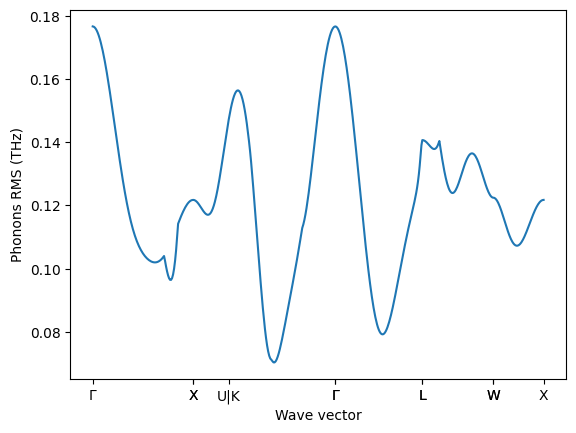

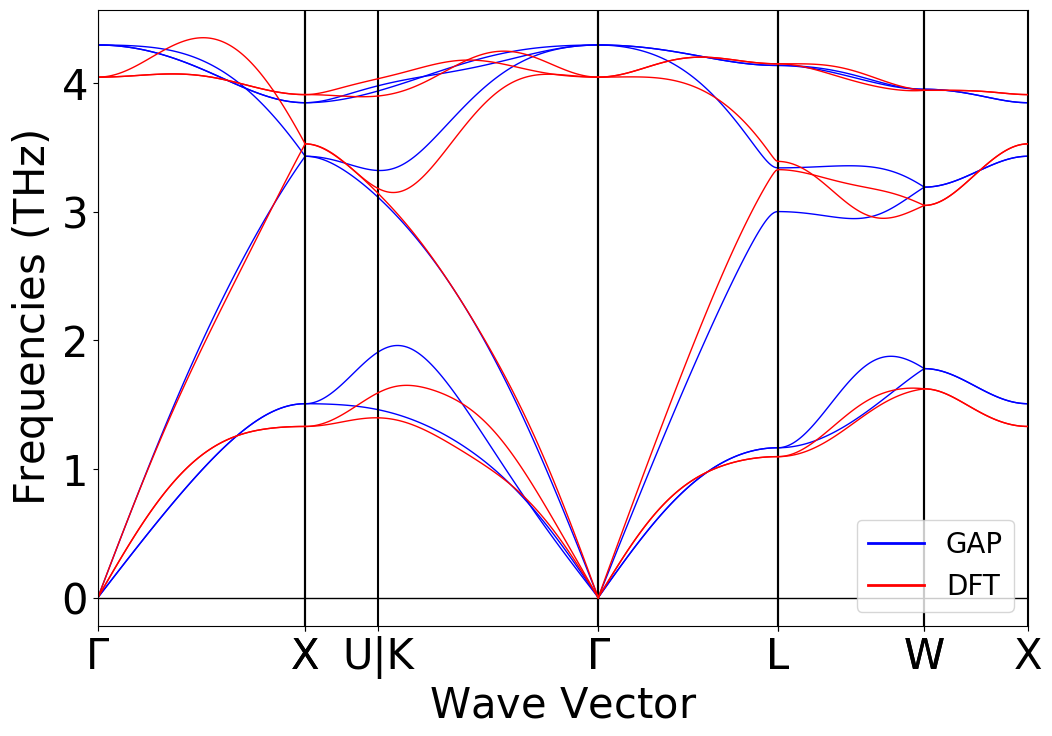

In [8]:
with mock_vasp(ref_paths=ref_paths, clean_folders=False) as mf:
    run_locally(
        autoplex_flow,
        create_folders=True,
        ensure_success=True,
        raise_immediately=True,
    )